## EXPLORATORY DATA ANALYSIS (DETECTING HUMAN ACTIVITY)

### Tools to use
pandas, numpy, matlob will be deployed in this project for the data analysis and manipulation

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Models from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# In this data analysis,three data activities(drop and pick up, shaking and sitting) will be analyzed 

In [3]:
#loading in data from drop and pick up

In [1]:
pwd

'C:\\Users\\user\\Desktop\\lecture materials\\programming for data science\\first semester assesement\\SUBMISSION\\sensor dataset'

In [5]:
drop_and_pickup_Acce = pd.read_excel('Dropandpickup_Acceleration.xlsx',sheet_name='Sheet1')
drop_and_pickup_AngV = pd.read_excel('Dropandpickup_AngularVelo.xlsx',sheet_name='Sheet1')
drop_and_pickup_Magn = pd.read_excel('Dropandpickup_MagneticField.xlsx',sheet_name='Sheet1')
drop_and_pickup_Orin = pd.read_excel('Dropandpickup_Orientation.xlsx',sheet_name='Sheet1')

In [6]:
#calling the first five row and last five row of the drop and pick up activity

In [7]:
drop_and_pickup_Acce.head()

Timestamp     Acc_X     Acc_Y     Acc_Z
0 2021-10-12 16:48:22.046  0.019759  4.468508  8.768915
1 2021-10-12 16:48:22.096  0.318837  4.683910  8.465047
2 2021-10-12 16:48:22.146  0.416883  4.603078  8.745264
3 2021-10-12 16:48:22.196 -0.167651  4.635111  9.079669
4 2021-10-12 16:48:22.245 -0.216899  4.424649  9.309890

In [8]:
drop_and_pickup_Acce.tail()

Timestamp     Acc_X     Acc_Y     Acc_Z
2407 2021-10-12 16:50:22.253 -0.519570 -1.724713  9.573941
2408 2021-10-12 16:50:22.303 -0.531844 -1.738634  9.626781
2409 2021-10-12 16:50:22.353 -0.490380 -1.725612  9.504635
2410 2021-10-12 16:50:22.403 -0.524360 -1.725013  9.614057
2411 2021-10-12 16:50:22.453 -0.510289 -1.769919  9.609866

In [9]:
drop_and_pickup_AngV.head()

Timestamp    AngV_X    AngV_Y    AngV_Z
0 2021-10-12 16:48:22.046  0.328934 -0.157198  0.319977
1 2021-10-12 16:48:22.096  0.187821  0.009831  0.424637
2 2021-10-12 16:48:22.146  0.110486  0.276281  0.404375
3 2021-10-12 16:48:22.195  0.022287  0.118462  0.352483
4 2021-10-12 16:48:22.245 -0.142323 -0.049034  0.242339

In [10]:
drop_and_pickup_AngV.tail()

Timestamp    AngV_X    AngV_Y    AngV_Z
2407 2021-10-12 16:50:22.253 -0.001058  0.000409  0.002917
2408 2021-10-12 16:50:22.303  0.000967 -0.023903  0.004050
2409 2021-10-12 16:50:22.353  0.015231  0.019412  0.004143
2410 2021-10-12 16:50:22.403  0.003707 -0.014790  0.004611
2411 2021-10-12 16:50:22.453 -0.001119 -0.011228  0.002412

In [11]:
drop_and_pickup_Magn.head()

Timestamp      Mag_X      Mag_Y     Mag_Z
0 2021-10-12 16:48:22.049  25.285210  11.638275  2.919649
1 2021-10-12 16:48:22.099  25.446188  11.322353  2.863413
2 2021-10-12 16:48:22.149  25.559078  10.838833  2.730994
3 2021-10-12 16:48:22.199  25.685452  10.131504  3.091275
4 2021-10-12 16:48:22.249  25.824631   9.739887  3.179871

In [12]:
drop_and_pickup_Magn.tail()

Timestamp      Mag_X     Mag_Y     Mag_Z
2407 2021-10-12 16:50:22.256  24.997057 -8.212059  8.838473
2408 2021-10-12 16:50:22.306  25.066441 -8.369080  8.849306
2409 2021-10-12 16:50:22.356  25.025894 -8.453098  8.785559
2410 2021-10-12 16:50:22.406  25.069870 -8.471630  8.875005
2411 2021-10-12 16:50:22.456  25.155176 -8.443439  8.952583

In [13]:
drop_and_pickup_Orin.head()

Timestamp     Orin_X     Orin_Y    Orin_Z
0 2021-10-12 16:48:22.049 -89.927211 -27.495348  0.297514
1 2021-10-12 16:48:22.099 -91.270862 -28.043569 -0.402587
2 2021-10-12 16:48:22.149 -92.631925 -28.396564 -0.338320
3 2021-10-12 16:48:22.199 -93.813458 -28.433709 -0.432309
4 2021-10-12 16:48:22.249 -94.640750 -28.065897 -0.816558

In [14]:
drop_and_pickup_Orin.tail()

Timestamp      Orin_X     Orin_Y    Orin_Z
2407 2021-10-12 16:50:22.256 -112.529000  10.325466  2.838037
2408 2021-10-12 16:50:22.306 -112.527244  10.342051  2.801400
2409 2021-10-12 16:50:22.356 -112.520316  10.327972  2.821788
2410 2021-10-12 16:50:22.406 -112.520254  10.318132  2.814517
2411 2021-10-12 16:50:22.456 -112.511610  10.340578  2.798848

In [15]:
#to maintain one time stamp,leave the time stamp on acceleration and drop the time stamp for magnetic, angular velocity and orientation
drop_and_pickup_AngV = drop_and_pickup_AngV.drop('Timestamp',axis=1)
drop_and_pickup_Magn = drop_and_pickup_Magn.drop('Timestamp',axis=1)
drop_and_pickup_Orin = drop_and_pickup_Orin.drop('Timestamp',axis=1)

In [16]:
#combining all data frames in drop and pick up activity

In [17]:
df_drop_and_pickup = [drop_and_pickup_Acce,drop_and_pickup_AngV,drop_and_pickup_Magn,drop_and_pickup_Orin]

In [18]:
drop_and_pickup_Activity = pd.concat(df_drop_and_pickup,axis = 1)

In [19]:
#calling the first five row and last five row of the dropand pick up data frame

In [20]:
drop_and_pickup_Activity.head()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X    AngV_Y  \
0 2021-10-12 16:48:22.046  0.019759  4.468508  8.768915  0.328934 -0.157198   
1 2021-10-12 16:48:22.096  0.318837  4.683910  8.465047  0.187821  0.009831   
2 2021-10-12 16:48:22.146  0.416883  4.603078  8.745264  0.110486  0.276281   
3 2021-10-12 16:48:22.196 -0.167651  4.635111  9.079669  0.022287  0.118462   
4 2021-10-12 16:48:22.245 -0.216899  4.424649  9.309890 -0.142323 -0.049034   

     AngV_Z      Mag_X      Mag_Y     Mag_Z     Orin_X     Orin_Y    Orin_Z  
0  0.319977  25.285210  11.638275  2.919649 -89.927211 -27.495348  0.297514  
1  0.424637  25.446188  11.322353  2.863413 -91.270862 -28.043569 -0.402587  
2  0.404375  25.559078  10.838833  2.730994 -92.631925 -28.396564 -0.338320  
3  0.352483  25.685452  10.131504  3.091275 -93.813458 -28.433709 -0.432309  
4  0.242339  25.824631   9.739887  3.179871 -94.640750 -28.065897 -0.816558

Table above showed that all individual sensor data are now in one data frame

In [21]:
drop_and_pickup_Activity.tail()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
2407 2021-10-12 16:50:22.253 -0.519570 -1.724713  9.573941 -0.001058   
2408 2021-10-12 16:50:22.303 -0.531844 -1.738634  9.626781  0.000967   
2409 2021-10-12 16:50:22.353 -0.490380 -1.725612  9.504635  0.015231   
2410 2021-10-12 16:50:22.403 -0.524360 -1.725013  9.614057  0.003707   
2411 2021-10-12 16:50:22.453 -0.510289 -1.769919  9.609866 -0.001119   

        AngV_Y    AngV_Z      Mag_X     Mag_Y     Mag_Z      Orin_X  \
2407  0.000409  0.002917  24.997057 -8.212059  8.838473 -112.529000   
2408 -0.023903  0.004050  25.066441 -8.369080  8.849306 -112.527244   
2409  0.019412  0.004143  25.025894 -8.453098  8.785559 -112.520316   
2410 -0.014790  0.004611  25.069870 -8.471630  8.875005 -112.520254   
2411 -0.011228  0.002412  25.155176 -8.443439  8.952583 -112.511610   

         Orin_Y    Orin_Z  
2407  10.325466  2.838037  
2408  10.342051  2.801400  
2409  10.327972  2.821788  
2410  10.318132  2.814517  
2411  10.340578  2.798848

In [22]:
#Adding a new column with title activity
drop_and_pickup_Activity['Activity'] = 'drop_and_pickup'
drop_and_pickup_Activity

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
0    2021-10-12 16:48:22.046  0.019759  4.468508  8.768915  0.328934   
1    2021-10-12 16:48:22.096  0.318837  4.683910  8.465047  0.187821   
2    2021-10-12 16:48:22.146  0.416883  4.603078  8.745264  0.110486   
3    2021-10-12 16:48:22.196 -0.167651  4.635111  9.079669  0.022287   
4    2021-10-12 16:48:22.245 -0.216899  4.424649  9.309890 -0.142323   
...                      ...       ...       ...       ...       ...   
2407 2021-10-12 16:50:22.253 -0.519570 -1.724713  9.573941 -0.001058   
2408 2021-10-12 16:50:22.303 -0.531844 -1.738634  9.626781  0.000967   
2409 2021-10-12 16:50:22.353 -0.490380 -1.725612  9.504635  0.015231   
2410 2021-10-12 16:50:22.403 -0.524360 -1.725013  9.614057  0.003707   
2411 2021-10-12 16:50:22.453 -0.510289 -1.769919  9.609866 -0.001119   

        AngV_Y    AngV_Z      Mag_X      Mag_Y     Mag_Z      Orin_X  \
0    -0.157198  0.319977  25.285210  11.638275  2.919649  -89.927211   
1     0.009831  0.424637  25.446188  11.322353  2.863413  -91.270862   
2     0.276281  0.404375  25.559078  10.838833  2.730994  -92.631925   
3     0.118462  0.352483  25.685452  10.131504  3.091275  -93.813458   
4    -0.049034  0.242339  25.824631   9.739887  3.179871  -94.640750   
...        ...       ...        ...        ...       ...         ...   
2407  0.000409  0.002917  24.997057  -8.212059  8.838473 -112.529000   
2408 -0.023903  0.004050  25.066441  -8.369080  8.849306 -112.527244   
2409  0.019412  0.004143  25.025894  -8.453098  8.785559 -112.520316   
2410 -0.014790  0.004611  25.069870  -8.471630  8.875005 -112.520254   
2411 -0.011228  0.002412  25.155176  -8.443439  8.952583 -112.511610   

         Orin_Y    Orin_Z         Activity  
0    -27.495348  0.297514  drop_and_pickup  
1    -28.043569 -0.402587  drop_and_pickup  
2    -28.396564 -0.338320  drop_and_pickup  
3    -28.433709 -0.432309  drop_and_pickup  
4    -28.065897 -0.816558  drop_and_pickup  
...         ...       ...              ...  
2407  10.325466  2.838037  drop_and_pickup  
2408  10.342051  2.801400  drop_and_pickup  
2409  10.327972  2.821788  drop_and_pickup  
2410  10.318132  2.814517  drop_and_pickup  
2411  10.340578  2.798848  drop_and_pickup  

[2412 rows x 14 columns]

In [23]:
#checking the info of the dataframe

In [24]:
drop_and_pickup_Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  2412 non-null   datetime64[ns]
 1   Acc_X      2412 non-null   float64       
 2   Acc_Y      2412 non-null   float64       
 3   Acc_Z      2412 non-null   float64       
 4   AngV_X     2412 non-null   float64       
 5   AngV_Y     2412 non-null   float64       
 6   AngV_Z     2412 non-null   float64       
 7   Mag_X      2412 non-null   float64       
 8   Mag_Y      2412 non-null   float64       
 9   Mag_Z      2412 non-null   float64       
 10  Orin_X     2412 non-null   float64       
 11  Orin_Y     2412 non-null   float64       
 12  Orin_Z     2412 non-null   float64       
 13  Activity   2412 non-null   object        
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 263.9+ KB


infoabove shows the 2412 entries in drop and pick up data frame has no NaN value and the datatypes are float and object

In [25]:
#loading in data from shaking

In [26]:
Shaking_Acce = pd.read_excel('Shaking_Acceleration.xlsx',sheet_name='Sheet1')
Shaking_AngV = pd.read_excel('Shaking_AngularVelo.xlsx',sheet_name='Sheet1')
Shaking_Magn = pd.read_excel('Shaking_MagneticField.xlsx',sheet_name='Sheet1')
Shaking_Orin = pd.read_excel('Shaking_Orientation.xlsx',sheet_name='Sheet1')

In [27]:
#calling in the first five row and last five row

In [28]:
Shaking_Acce.head()

Timestamp     Acc_X     Acc_Y     Acc_Z
0 2021-10-12 16:36:38.940 -0.709075  6.852600  6.244864
1 2021-10-12 16:36:38.990 -0.492177  6.997948  6.805598
2 2021-10-12 16:36:39.040 -0.129181  6.788833  6.659951
3 2021-10-12 16:36:39.090 -0.211061  6.725514  7.420669
4 2021-10-12 16:36:39.140 -0.423320  6.008954  9.076675

In [29]:
Shaking_Acce.tail()

Timestamp     Acc_X     Acc_Y     Acc_Z
2424 2021-10-12 16:38:39.996 -0.911754  7.385043  6.352490
2425 2021-10-12 16:38:40.046 -1.092728  7.376810  5.783074
2426 2021-10-12 16:38:40.096 -0.876278  7.294182  6.136938
2427 2021-10-12 16:38:40.146 -1.215023  7.117699  6.524333
2428 2021-10-12 16:38:40.196 -1.588347  7.390132  6.965914

In [30]:
Shaking_AngV.head()

Timestamp    AngV_X    AngV_Y    AngV_Z
0 2021-10-12 16:36:38.940 -0.253269 -0.253450 -0.118376
1 2021-10-12 16:36:38.990 -0.429179 -0.506052 -0.200277
2 2021-10-12 16:36:39.040 -0.633407 -0.605234 -0.273654
3 2021-10-12 16:36:39.090 -0.093921 -0.214890 -0.223352
4 2021-10-12 16:36:39.140 -0.084941 -0.635440 -0.197499

In [31]:
Shaking_AngV.tail()

Timestamp    AngV_X    AngV_Y    AngV_Z
2424 2021-10-12 16:38:39.996  0.317604  0.238845  0.082533
2425 2021-10-12 16:38:40.046  0.281083  0.328480  0.109969
2426 2021-10-12 16:38:40.096 -0.000007  0.260181  0.019422
2427 2021-10-12 16:38:40.146 -0.103375 -0.177965 -0.189399
2428 2021-10-12 16:38:40.196 -0.047350 -0.375342 -0.075388

In [32]:
Shaking_Magn.head()

Timestamp      Mag_X      Mag_Y     Mag_Z
0 2021-10-12 16:36:38.955  25.955524  10.072693  1.733309
1 2021-10-12 16:36:39.005  26.054001  10.230667  1.487121
2 2021-10-12 16:36:39.055  25.845650  10.687027  0.472438
3 2021-10-12 16:36:39.105  25.832787  10.973801 -0.137860
4 2021-10-12 16:36:39.155  25.646381  11.164108 -0.507003

In [33]:
Shaking_Magn.tail()

Timestamp      Mag_X     Mag_Y     Mag_Z
2424 2021-10-12 16:38:40.010  27.151245  4.140968  7.484862
2425 2021-10-12 16:38:40.060  27.049339  4.148663  7.735090
2426 2021-10-12 16:38:40.110  27.007057  4.170101  8.349785
2427 2021-10-12 16:38:40.160  26.785431  4.231976  8.615320
2428 2021-10-12 16:38:40.210  26.813007  4.432281  8.164059

In [34]:
Shaking_Orin.head()

Timestamp      Orin_X     Orin_Y    Orin_Z
0 2021-10-12 16:36:38.955 -134.455536 -44.836472  6.071714
1 2021-10-12 16:36:39.005 -133.803395 -43.601879  5.295420
2 2021-10-12 16:36:39.055 -133.036758 -41.785303  4.044160
3 2021-10-12 16:36:39.105 -132.141353 -40.979426  4.043689
4 2021-10-12 16:36:39.155 -131.477417 -40.632547  3.208899

In [35]:
Shaking_Orin.tail()

Timestamp      Orin_X     Orin_Y     Orin_Z
2424 2021-10-12 16:38:40.011 -142.965556 -35.866125   9.517976
2425 2021-10-12 16:38:40.061 -143.162326 -36.690470  10.178633
2426 2021-10-12 16:38:40.110 -143.247720 -36.865033  10.984097
2427 2021-10-12 16:38:40.160 -142.783939 -36.526375  10.901657
2428 2021-10-12 16:38:40.210 -142.463452 -36.269716  10.043061

In [36]:
#keeping the timestamp for acceleration, and removing the timestamp for the angular velocity, magnetic field and orientation

In [37]:
Shaking_AngV = Shaking_AngV.drop('Timestamp',axis =1)
Shaking_Magn = Shaking_Magn.drop('Timestamp',axis =1)
Shaking_Orin = Shaking_Orin.drop('Timestamp',axis =1)

In [38]:
#combining all data frame in Shaking activity

In [39]:
df_Shaking = [Shaking_Acce,Shaking_AngV,Shaking_Magn,Shaking_Orin]

In [40]:
Shaking_Activity = pd.concat(df_Shaking,axis = 1)

In [41]:
#calling the first five and the last five row

In [42]:
Shaking_Activity.head()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X    AngV_Y  \
0 2021-10-12 16:36:38.940 -0.709075  6.852600  6.244864 -0.253269 -0.253450   
1 2021-10-12 16:36:38.990 -0.492177  6.997948  6.805598 -0.429179 -0.506052   
2 2021-10-12 16:36:39.040 -0.129181  6.788833  6.659951 -0.633407 -0.605234   
3 2021-10-12 16:36:39.090 -0.211061  6.725514  7.420669 -0.093921 -0.214890   
4 2021-10-12 16:36:39.140 -0.423320  6.008954  9.076675 -0.084941 -0.635440   

     AngV_Z      Mag_X      Mag_Y     Mag_Z      Orin_X     Orin_Y    Orin_Z  
0 -0.118376  25.955524  10.072693  1.733309 -134.455536 -44.836472  6.071714  
1 -0.200277  26.054001  10.230667  1.487121 -133.803395 -43.601879  5.295420  
2 -0.273654  25.845650  10.687027  0.472438 -133.036758 -41.785303  4.044160  
3 -0.223352  25.832787  10.973801 -0.137860 -132.141353 -40.979426  4.043689  
4 -0.197499  25.646381  11.164108 -0.507003 -131.477417 -40.632547  3.208899

In [43]:
Shaking_Activity.tail()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
2424 2021-10-12 16:38:39.996 -0.911754  7.385043  6.352490  0.317604   
2425 2021-10-12 16:38:40.046 -1.092728  7.376810  5.783074  0.281083   
2426 2021-10-12 16:38:40.096 -0.876278  7.294182  6.136938 -0.000007   
2427 2021-10-12 16:38:40.146 -1.215023  7.117699  6.524333 -0.103375   
2428 2021-10-12 16:38:40.196 -1.588347  7.390132  6.965914 -0.047350   

        AngV_Y    AngV_Z      Mag_X     Mag_Y     Mag_Z      Orin_X  \
2424  0.238845  0.082533  27.151245  4.140968  7.484862 -142.965556   
2425  0.328480  0.109969  27.049339  4.148663  7.735090 -143.162326   
2426  0.260181  0.019422  27.007057  4.170101  8.349785 -143.247720   
2427 -0.177965 -0.189399  26.785431  4.231976  8.615320 -142.783939   
2428 -0.375342 -0.075388  26.813007  4.432281  8.164059 -142.463452   

         Orin_Y     Orin_Z  
2424 -35.866125   9.517976  
2425 -36.690470  10.178633  
2426 -36.865033  10.984097  
2427 -36.526375  10.901657  
2428 -36.269716  10.043061

In [44]:
#creating a new column with name Activity for Shaking
Shaking_Activity ['Activity'] = 'Shaking'

In [45]:
Shaking_Activity

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
0    2021-10-12 16:36:38.940 -0.709075  6.852600  6.244864 -0.253269   
1    2021-10-12 16:36:38.990 -0.492177  6.997948  6.805598 -0.429179   
2    2021-10-12 16:36:39.040 -0.129181  6.788833  6.659951 -0.633407   
3    2021-10-12 16:36:39.090 -0.211061  6.725514  7.420669 -0.093921   
4    2021-10-12 16:36:39.140 -0.423320  6.008954  9.076675 -0.084941   
...                      ...       ...       ...       ...       ...   
2424 2021-10-12 16:38:39.996 -0.911754  7.385043  6.352490  0.317604   
2425 2021-10-12 16:38:40.046 -1.092728  7.376810  5.783074  0.281083   
2426 2021-10-12 16:38:40.096 -0.876278  7.294182  6.136938 -0.000007   
2427 2021-10-12 16:38:40.146 -1.215023  7.117699  6.524333 -0.103375   
2428 2021-10-12 16:38:40.196 -1.588347  7.390132  6.965914 -0.047350   

        AngV_Y    AngV_Z      Mag_X      Mag_Y     Mag_Z      Orin_X  \
0    -0.253450 -0.118376  25.955524  10.072693  1.733309 -134.455536   
1    -0.506052 -0.200277  26.054001  10.230667  1.487121 -133.803395   
2    -0.605234 -0.273654  25.845650  10.687027  0.472438 -133.036758   
3    -0.214890 -0.223352  25.832787  10.973801 -0.137860 -132.141353   
4    -0.635440 -0.197499  25.646381  11.164108 -0.507003 -131.477417   
...        ...       ...        ...        ...       ...         ...   
2424  0.238845  0.082533  27.151245   4.140968  7.484862 -142.965556   
2425  0.328480  0.109969  27.049339   4.148663  7.735090 -143.162326   
2426  0.260181  0.019422  27.007057   4.170101  8.349785 -143.247720   
2427 -0.177965 -0.189399  26.785431   4.231976  8.615320 -142.783939   
2428 -0.375342 -0.075388  26.813007   4.432281  8.164059 -142.463452   

         Orin_Y     Orin_Z Activity  
0    -44.836472   6.071714  Shaking  
1    -43.601879   5.295420  Shaking  
2    -41.785303   4.044160  Shaking  
3    -40.979426   4.043689  Shaking  
4    -40.632547   3.208899  Shaking  
...         ...        ...      ...  
2424 -35.866125   9.517976  Shaking  
2425 -36.690470  10.178633  Shaking  
2426 -36.865033  10.984097  Shaking  
2427 -36.526375  10.901657  Shaking  
2428 -36.269716  10.043061  Shaking  

[2429 rows x 14 columns]

In [46]:
#checking the info
Shaking_Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  2429 non-null   datetime64[ns]
 1   Acc_X      2429 non-null   float64       
 2   Acc_Y      2429 non-null   float64       
 3   Acc_Z      2429 non-null   float64       
 4   AngV_X     2429 non-null   float64       
 5   AngV_Y     2429 non-null   float64       
 6   AngV_Z     2429 non-null   float64       
 7   Mag_X      2429 non-null   float64       
 8   Mag_Y      2429 non-null   float64       
 9   Mag_Z      2429 non-null   float64       
 10  Orin_X     2429 non-null   float64       
 11  Orin_Y     2429 non-null   float64       
 12  Orin_Z     2429 non-null   float64       
 13  Activity   2429 non-null   object        
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 265.8+ KB


Data info above shows that the 2429 entries has no null have and the datatypes are float and object.

In [47]:
#loading in data for Sitting

In [48]:
Sitting_Acce = pd.read_excel('Sitting_Acceleration.xlsx',sheet_name='Sheet1')
Sitting_AngV = pd.read_excel('Sitting_AngularVelo.xlsx',sheet_name='Sheet1')
Sitting_Magn = pd.read_excel('Sitting_MagneticField.xlsx',sheet_name='Sheet1')
Sitting_Orin = pd.read_excel('Sitting_Orientation.xlsx',sheet_name='Sheet1')

In [49]:
#checking the first and last five rows of above imported data

In [50]:
Sitting_Acce.head()

Timestamp     Acc_X     Acc_Y     Acc_Z
0 2021-10-12 16:40:26.284 -0.270937  4.212989  8.432564
1 2021-10-12 16:40:26.334 -0.612077  4.524491  8.280780
2 2021-10-12 16:40:26.384 -0.355062  3.965703  8.352182
3 2021-10-12 16:40:26.434 -0.166304  4.070785  8.385712
4 2021-10-12 16:40:26.484 -0.379311  3.898343  9.748927

In [51]:
Sitting_Acce.tail()

Timestamp     Acc_X     Acc_Y     Acc_Z
2431 2021-10-12 16:42:27.689 -1.254841  0.188308  9.663155
2432 2021-10-12 16:42:27.739 -1.256936  0.196242  9.675130
2433 2021-10-12 16:42:27.789 -1.260229  0.193847  9.683513
2434 2021-10-12 16:42:27.839 -1.254691  0.191901  9.670939
2435 2021-10-12 16:42:27.888 -1.249003  0.071402  9.596095

In [52]:
Sitting_AngV.head()

Timestamp    AngV_X    AngV_Y    AngV_Z
0 2021-10-12 16:40:26.234 -0.200233 -0.027906  0.029003
1 2021-10-12 16:40:26.284 -0.108092 -0.078474 -0.106877
2 2021-10-12 16:40:26.334 -0.046267  0.106956  0.021738
3 2021-10-12 16:40:26.384 -0.163156 -0.118823 -0.013065
4 2021-10-12 16:40:26.434 -0.466125 -0.142810 -0.151507

In [53]:
Sitting_AngV.tail()

Timestamp    AngV_X    AngV_Y    AngV_Z
2432 2021-10-12 16:42:27.689  0.006431  0.003111  0.006988
2433 2021-10-12 16:42:27.739  0.006782  0.002981  0.007969
2434 2021-10-12 16:42:27.789  0.008840  0.002525  0.005792
2435 2021-10-12 16:42:27.839  0.007338  0.002817  0.006609
2436 2021-10-12 16:42:27.888 -0.011682  0.005222 -0.058561

In [54]:
Sitting_Magn.head()

Timestamp      Mag_X      Mag_Y     Mag_Z
0 2021-10-12 16:40:26.249  22.469095  12.903316 -1.975067
1 2021-10-12 16:40:26.299  22.492758  12.700611 -1.628903
2 2021-10-12 16:40:26.349  22.432247  13.114136 -1.789617
3 2021-10-12 16:40:26.399  22.285461  13.303642 -1.594745
4 2021-10-12 16:40:26.449  22.038797  13.458038 -1.413400

In [55]:
Sitting_Magn.tail()

Timestamp      Mag_X      Mag_Y      Mag_Z
2432 2021-10-12 16:42:27.704 -13.350305  17.433907  59.778374
2433 2021-10-12 16:42:27.754 -13.431933  17.490631  59.838013
2434 2021-10-12 16:42:27.804 -13.431907  17.516876  59.896400
2435 2021-10-12 16:42:27.854 -13.434371  17.303093  60.112587
2436 2021-10-12 16:42:27.904 -13.364202  17.457771  60.236618

In [56]:
Sitting_Orin.head()

Timestamp     Orin_X     Orin_Y    Orin_Z
0 2021-10-12 16:40:26.249 -99.817698 -28.243857  4.293837
1 2021-10-12 16:40:26.299 -99.524564 -27.935252  4.302967
2 2021-10-12 16:40:26.349 -99.544922 -27.688032  4.637502
3 2021-10-12 16:40:26.399 -99.617327 -27.271450  4.324641
4 2021-10-12 16:40:26.449 -99.268702 -26.049641  3.964919

In [57]:
Sitting_Orin.tail()

Timestamp     Orin_X    Orin_Y    Orin_Z
2432 2021-10-12 16:42:27.704 -75.207479 -1.130067  7.396172
2433 2021-10-12 16:42:27.754 -75.209698 -1.130081  7.397170
2434 2021-10-12 16:42:27.804 -75.208425 -1.130816  7.397299
2435 2021-10-12 16:42:27.854 -75.207970 -1.135194  7.398510
2436 2021-10-12 16:42:27.904 -75.074723 -1.130379  7.401542

In [58]:
#maintaining the acceleration timestamp for all sitting activity

In [59]:
Sitting_AngV = Sitting_AngV.drop('Timestamp',axis=1)
Sitting_Magn = Sitting_Magn.drop('Timestamp',axis=1)
Sitting_Orin = Sitting_Orin.drop('Timestamp',axis=1)

In [60]:
#combining al data frame in sitting activity

In [61]:
df_Sitting = [Sitting_Acce,Sitting_AngV,Sitting_Magn,Sitting_Orin]
Sitting_Activity = pd.concat(df_Sitting,axis = 1)

In [62]:
#checking the first and last five rows
Sitting_Activity.head()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X    AngV_Y  \
0 2021-10-12 16:40:26.284 -0.270937  4.212989  8.432564 -0.200233 -0.027906   
1 2021-10-12 16:40:26.334 -0.612077  4.524491  8.280780 -0.108092 -0.078474   
2 2021-10-12 16:40:26.384 -0.355062  3.965703  8.352182 -0.046267  0.106956   
3 2021-10-12 16:40:26.434 -0.166304  4.070785  8.385712 -0.163156 -0.118823   
4 2021-10-12 16:40:26.484 -0.379311  3.898343  9.748927 -0.466125 -0.142810   

     AngV_Z      Mag_X      Mag_Y     Mag_Z     Orin_X     Orin_Y    Orin_Z  
0  0.029003  22.469095  12.903316 -1.975067 -99.817698 -28.243857  4.293837  
1 -0.106877  22.492758  12.700611 -1.628903 -99.524564 -27.935252  4.302967  
2  0.021738  22.432247  13.114136 -1.789617 -99.544922 -27.688032  4.637502  
3 -0.013065  22.285461  13.303642 -1.594745 -99.617327 -27.271450  4.324641  
4 -0.151507  22.038797  13.458038 -1.413400 -99.268702 -26.049641  3.964919

In [63]:
Sitting_Activity.tail()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
2432 2021-10-12 16:42:27.739 -1.256936  0.196242  9.675130  0.006431   
2433 2021-10-12 16:42:27.789 -1.260229  0.193847  9.683513  0.006782   
2434 2021-10-12 16:42:27.839 -1.254691  0.191901  9.670939  0.008840   
2435 2021-10-12 16:42:27.888 -1.249003  0.071402  9.596095  0.007338   
2436                     NaT       NaN       NaN       NaN -0.011682   

        AngV_Y    AngV_Z      Mag_X      Mag_Y      Mag_Z     Orin_X  \
2432  0.003111  0.006988 -13.350305  17.433907  59.778374 -75.207479   
2433  0.002981  0.007969 -13.431933  17.490631  59.838013 -75.209698   
2434  0.002525  0.005792 -13.431907  17.516876  59.896400 -75.208425   
2435  0.002817  0.006609 -13.434371  17.303093  60.112587 -75.207970   
2436  0.005222 -0.058561 -13.364202  17.457771  60.236618 -75.074723   

        Orin_Y    Orin_Z  
2432 -1.130067  7.396172  
2433 -1.130081  7.397170  
2434 -1.130816  7.397299  
2435 -1.135194  7.398510  
2436 -1.130379  7.401542

In [64]:
#addinga new column with name activity
Sitting_Activity['Activity'] = "Sitting"

In [65]:
Sitting_Activity.tail()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
2432 2021-10-12 16:42:27.739 -1.256936  0.196242  9.675130  0.006431   
2433 2021-10-12 16:42:27.789 -1.260229  0.193847  9.683513  0.006782   
2434 2021-10-12 16:42:27.839 -1.254691  0.191901  9.670939  0.008840   
2435 2021-10-12 16:42:27.888 -1.249003  0.071402  9.596095  0.007338   
2436                     NaT       NaN       NaN       NaN -0.011682   

        AngV_Y    AngV_Z      Mag_X      Mag_Y      Mag_Z     Orin_X  \
2432  0.003111  0.006988 -13.350305  17.433907  59.778374 -75.207479   
2433  0.002981  0.007969 -13.431933  17.490631  59.838013 -75.209698   
2434  0.002525  0.005792 -13.431907  17.516876  59.896400 -75.208425   
2435  0.002817  0.006609 -13.434371  17.303093  60.112587 -75.207970   
2436  0.005222 -0.058561 -13.364202  17.457771  60.236618 -75.074723   

        Orin_Y    Orin_Z Activity  
2432 -1.130067  7.396172  Sitting  
2433 -1.130081  7.397170  Sitting  
2434 -1.130816  7.397299  Sitting  
2435 -1.135194  7.398510  Sitting  
2436 -1.130379  7.401542  Sitting

Table above shows the existence of a NaN value, this will be dropped.

In [66]:
#droping NaN value

In [67]:
Sitting_Activity = Sitting_Activity.dropna()

In [68]:
Sitting_Activity

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
0    2021-10-12 16:40:26.284 -0.270937  4.212989  8.432564 -0.200233   
1    2021-10-12 16:40:26.334 -0.612077  4.524491  8.280780 -0.108092   
2    2021-10-12 16:40:26.384 -0.355062  3.965703  8.352182 -0.046267   
3    2021-10-12 16:40:26.434 -0.166304  4.070785  8.385712 -0.163156   
4    2021-10-12 16:40:26.484 -0.379311  3.898343  9.748927 -0.466125   
...                      ...       ...       ...       ...       ...   
2431 2021-10-12 16:42:27.689 -1.254841  0.188308  9.663155  0.007543   
2432 2021-10-12 16:42:27.739 -1.256936  0.196242  9.675130  0.006431   
2433 2021-10-12 16:42:27.789 -1.260229  0.193847  9.683513  0.006782   
2434 2021-10-12 16:42:27.839 -1.254691  0.191901  9.670939  0.008840   
2435 2021-10-12 16:42:27.888 -1.249003  0.071402  9.596095  0.007338   

        AngV_Y    AngV_Z      Mag_X      Mag_Y      Mag_Z     Orin_X  \
0    -0.027906  0.029003  22.469095  12.903316  -1.975067 -99.817698   
1    -0.078474 -0.106877  22.492758  12.700611  -1.628903 -99.524564   
2     0.106956  0.021738  22.432247  13.114136  -1.789617 -99.544922   
3    -0.118823 -0.013065  22.285461  13.303642  -1.594745 -99.617327   
4    -0.142810 -0.151507  22.038797  13.458038  -1.413400 -99.268702   
...        ...       ...        ...        ...        ...        ...   
2431  0.002132  0.003930 -13.455758  17.473938  59.677711 -75.209055   
2432  0.003111  0.006988 -13.350305  17.433907  59.778374 -75.207479   
2433  0.002981  0.007969 -13.431933  17.490631  59.838013 -75.209698   
2434  0.002525  0.005792 -13.431907  17.516876  59.896400 -75.208425   
2435  0.002817  0.006609 -13.434371  17.303093  60.112587 -75.207970   

         Orin_Y    Orin_Z Activity  
0    -28.243857  4.293837  Sitting  
1    -27.935252  4.302967  Sitting  
2    -27.688032  4.637502  Sitting  
3    -27.271450  4.324641  Sitting  
4    -26.049641  3.964919  Sitting  
...         ...       ...      ...  
2431  -1.130628  7.397709  Sitting  
2432  -1.130067  7.396172  Sitting  
2433  -1.130081  7.397170  Sitting  
2434  -1.130816  7.397299  Sitting  
2435  -1.135194  7.398510  Sitting  

[2436 rows x 14 columns]

In [69]:
#checking data info
Sitting_Activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2435
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  2436 non-null   datetime64[ns]
 1   Acc_X      2436 non-null   float64       
 2   Acc_Y      2436 non-null   float64       
 3   Acc_Z      2436 non-null   float64       
 4   AngV_X     2436 non-null   float64       
 5   AngV_Y     2436 non-null   float64       
 6   AngV_Z     2436 non-null   float64       
 7   Mag_X      2436 non-null   float64       
 8   Mag_Y      2436 non-null   float64       
 9   Mag_Z      2436 non-null   float64       
 10  Orin_X     2436 non-null   float64       
 11  Orin_Y     2436 non-null   float64       
 12  Orin_Z     2436 non-null   float64       
 13  Activity   2436 non-null   object        
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 285.5+ KB


Having dropped the NaN value, data info above shows the 2436 entries has no null value and the data types are float and object.

# combining three activities (drop and pickup, Shaking, Sitting) in one master data frame

In [70]:
df_all_activity = [drop_and_pickup_Activity,Shaking_Activity,Sitting_Activity]

In [71]:
master_df = pd.concat(df_all_activity,axis= 0)
master_df

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
0    2021-10-12 16:48:22.046  0.019759  4.468508  8.768915  0.328934   
1    2021-10-12 16:48:22.096  0.318837  4.683910  8.465047  0.187821   
2    2021-10-12 16:48:22.146  0.416883  4.603078  8.745264  0.110486   
3    2021-10-12 16:48:22.196 -0.167651  4.635111  9.079669  0.022287   
4    2021-10-12 16:48:22.245 -0.216899  4.424649  9.309890 -0.142323   
...                      ...       ...       ...       ...       ...   
2431 2021-10-12 16:42:27.689 -1.254841  0.188308  9.663155  0.007543   
2432 2021-10-12 16:42:27.739 -1.256936  0.196242  9.675130  0.006431   
2433 2021-10-12 16:42:27.789 -1.260229  0.193847  9.683513  0.006782   
2434 2021-10-12 16:42:27.839 -1.254691  0.191901  9.670939  0.008840   
2435 2021-10-12 16:42:27.888 -1.249003  0.071402  9.596095  0.007338   

        AngV_Y    AngV_Z      Mag_X      Mag_Y      Mag_Z     Orin_X  \
0    -0.157198  0.319977  25.285210  11.638275   2.919649 -89.927211   
1     0.009831  0.424637  25.446188  11.322353   2.863413 -91.270862   
2     0.276281  0.404375  25.559078  10.838833   2.730994 -92.631925   
3     0.118462  0.352483  25.685452  10.131504   3.091275 -93.813458   
4    -0.049034  0.242339  25.824631   9.739887   3.179871 -94.640750   
...        ...       ...        ...        ...        ...        ...   
2431  0.002132  0.003930 -13.455758  17.473938  59.677711 -75.209055   
2432  0.003111  0.006988 -13.350305  17.433907  59.778374 -75.207479   
2433  0.002981  0.007969 -13.431933  17.490631  59.838013 -75.209698   
2434  0.002525  0.005792 -13.431907  17.516876  59.896400 -75.208425   
2435  0.002817  0.006609 -13.434371  17.303093  60.112587 -75.207970   

         Orin_Y    Orin_Z         Activity  
0    -27.495348  0.297514  drop_and_pickup  
1    -28.043569 -0.402587  drop_and_pickup  
2    -28.396564 -0.338320  drop_and_pickup  
3    -28.433709 -0.432309  drop_and_pickup  
4    -28.065897 -0.816558  drop_and_pickup  
...         ...       ...              ...  
2431  -1.130628  7.397709          Sitting  
2432  -1.130067  7.396172          Sitting  
2433  -1.130081  7.397170          Sitting  
2434  -1.130816  7.397299          Sitting  
2435  -1.135194  7.398510          Sitting  

[7277 rows x 14 columns]

All the three acticities with their individual sensors are now combined in one master data frame.

### Univariate analysis EDA

In [72]:
master_df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Timestamp', 'Acc_X', 'Acc_Y', 'Acc_Z', 'AngV_X', 'AngV_Y', 'AngV_Z',
       'Mag_X', 'Mag_Y', 'Mag_Z', 'Orin_X', 'Orin_Y', 'Orin_Z', 'Activity'],
      dtype='object')>

In [73]:
m = ['Acc_X', 'Acc_Y', 'Acc_Z', 'AngV_X', 'AngV_Y', 'AngV_Z',
       'Mag_X', 'Mag_Y', 'Mag_Z', 'Orin_X', 'Orin_Y', 'Orin_Z']

In [74]:
fig = plt.figure(figsize=[12,7], dpi=100)
fig.subplots_adjust(hspace=0.5, wspace=0.25)
sns.set(font_scale=0.8)
# sns.set_style("darkgrid")
col = m
j = 1
for i in col:
    ax = fig.add_subplot(4,3,j)
    sns.stripplot(master_df['Activity'], master_df[i], jitter=True, ax=ax);
    #sns.histplot(master_df[i], ax=ax, color = 'r', kde =False)
    j = j+1
    if j>len(col):
        break
#plt.show()

above strip plot shows the individual presentation of activities, shaking seems to have the most activity compared to other activity

# Reseting the index so as to have proper numbering

In [75]:
master_df = master_df.reset_index()

In [76]:
master_df.head()

index               Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
0      0 2021-10-12 16:48:22.046  0.019759  4.468508  8.768915  0.328934   
1      1 2021-10-12 16:48:22.096  0.318837  4.683910  8.465047  0.187821   
2      2 2021-10-12 16:48:22.146  0.416883  4.603078  8.745264  0.110486   
3      3 2021-10-12 16:48:22.196 -0.167651  4.635111  9.079669  0.022287   
4      4 2021-10-12 16:48:22.245 -0.216899  4.424649  9.309890 -0.142323   

     AngV_Y    AngV_Z      Mag_X      Mag_Y     Mag_Z     Orin_X     Orin_Y  \
0 -0.157198  0.319977  25.285210  11.638275  2.919649 -89.927211 -27.495348   
1  0.009831  0.424637  25.446188  11.322353  2.863413 -91.270862 -28.043569   
2  0.276281  0.404375  25.559078  10.838833  2.730994 -92.631925 -28.396564   
3  0.118462  0.352483  25.685452  10.131504  3.091275 -93.813458 -28.433709   
4 -0.049034  0.242339  25.824631   9.739887  3.179871 -94.640750 -28.065897   

     Orin_Z         Activity  
0  0.297514  drop_and_pickup  
1 -0.402587  drop_and_pickup  
2 -0.338320  drop_and_pickup  
3 -0.432309  drop_and_pickup  
4 -0.816558  drop_and_pickup

In [77]:
master_df.tail()

index               Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
7272   2431 2021-10-12 16:42:27.689 -1.254841  0.188308  9.663155  0.007543   
7273   2432 2021-10-12 16:42:27.739 -1.256936  0.196242  9.675130  0.006431   
7274   2433 2021-10-12 16:42:27.789 -1.260229  0.193847  9.683513  0.006782   
7275   2434 2021-10-12 16:42:27.839 -1.254691  0.191901  9.670939  0.008840   
7276   2435 2021-10-12 16:42:27.888 -1.249003  0.071402  9.596095  0.007338   

        AngV_Y    AngV_Z      Mag_X      Mag_Y      Mag_Z     Orin_X  \
7272  0.002132  0.003930 -13.455758  17.473938  59.677711 -75.209055   
7273  0.003111  0.006988 -13.350305  17.433907  59.778374 -75.207479   
7274  0.002981  0.007969 -13.431933  17.490631  59.838013 -75.209698   
7275  0.002525  0.005792 -13.431907  17.516876  59.896400 -75.208425   
7276  0.002817  0.006609 -13.434371  17.303093  60.112587 -75.207970   

        Orin_Y    Orin_Z Activity  
7272 -1.130628  7.397709  Sitting  
7273 -1.130067  7.396172  Sitting  
7274 -1.130081  7.397170  Sitting  
7275 -1.130816  7.397299  Sitting  
7276 -1.135194  7.398510  Sitting

In [78]:
master_df = master_df.drop('index',axis=1)

In [79]:
master_df

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
0    2021-10-12 16:48:22.046  0.019759  4.468508  8.768915  0.328934   
1    2021-10-12 16:48:22.096  0.318837  4.683910  8.465047  0.187821   
2    2021-10-12 16:48:22.146  0.416883  4.603078  8.745264  0.110486   
3    2021-10-12 16:48:22.196 -0.167651  4.635111  9.079669  0.022287   
4    2021-10-12 16:48:22.245 -0.216899  4.424649  9.309890 -0.142323   
...                      ...       ...       ...       ...       ...   
7272 2021-10-12 16:42:27.689 -1.254841  0.188308  9.663155  0.007543   
7273 2021-10-12 16:42:27.739 -1.256936  0.196242  9.675130  0.006431   
7274 2021-10-12 16:42:27.789 -1.260229  0.193847  9.683513  0.006782   
7275 2021-10-12 16:42:27.839 -1.254691  0.191901  9.670939  0.008840   
7276 2021-10-12 16:42:27.888 -1.249003  0.071402  9.596095  0.007338   

        AngV_Y    AngV_Z      Mag_X      Mag_Y      Mag_Z     Orin_X  \
0    -0.157198  0.319977  25.285210  11.638275   2.919649 -89.927211   
1     0.009831  0.424637  25.446188  11.322353   2.863413 -91.270862   
2     0.276281  0.404375  25.559078  10.838833   2.730994 -92.631925   
3     0.118462  0.352483  25.685452  10.131504   3.091275 -93.813458   
4    -0.049034  0.242339  25.824631   9.739887   3.179871 -94.640750   
...        ...       ...        ...        ...        ...        ...   
7272  0.002132  0.003930 -13.455758  17.473938  59.677711 -75.209055   
7273  0.003111  0.006988 -13.350305  17.433907  59.778374 -75.207479   
7274  0.002981  0.007969 -13.431933  17.490631  59.838013 -75.209698   
7275  0.002525  0.005792 -13.431907  17.516876  59.896400 -75.208425   
7276  0.002817  0.006609 -13.434371  17.303093  60.112587 -75.207970   

         Orin_Y    Orin_Z         Activity  
0    -27.495348  0.297514  drop_and_pickup  
1    -28.043569 -0.402587  drop_and_pickup  
2    -28.396564 -0.338320  drop_and_pickup  
3    -28.433709 -0.432309  drop_and_pickup  
4    -28.065897 -0.816558  drop_and_pickup  
...         ...       ...              ...  
7272  -1.130628  7.397709          Sitting  
7273  -1.130067  7.396172          Sitting  
7274  -1.130081  7.397170          Sitting  
7275  -1.130816  7.397299          Sitting  
7276  -1.135194  7.398510          Sitting  

[7277 rows x 14 columns]

The index have now been dropped and one numbering maintained

In [80]:
#checking the info on the activity column

In [81]:
master_df['Activity'].unique()

array(['drop_and_pickup', 'Shaking', 'Sitting'], dtype=object)

This shows the make up of the activity column, it has got to show the three activities being analyzedand the data type is object

# Data Visualizations

In [82]:
#visualizing Acceleration

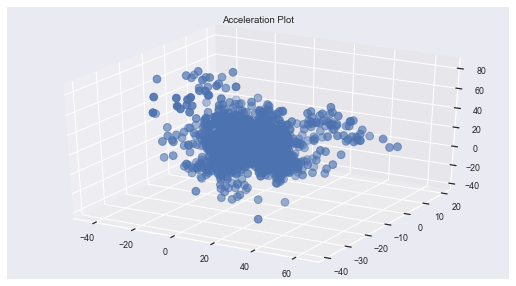

In [83]:
fig = plt.figure(figsize=(9,5))

ax = plt.axes(projection='3d')
zline = master_df['Acc_Z']
xline = master_df['Acc_X']
yline = master_df['Acc_Y']
ax.scatter3D(xline, yline, zline, cmap='rainbow',s=60);
plt.title('Acceleration Plot')
plt.show()

The plot shows a scattered visuals,however there is an existence of cluster which may have been a similar activity taking place at the point.

In [84]:
# Visualizing Angular Velocity

In [85]:
fig = plt.figure(figsize=(9,5))

ax = plt.axes(projection='3d')
zline = master_df['AngV_Z']
xline = master_df['AngV_X']
yline = master_df['AngV_Y']
ax.scatter3D(xline, yline, zline, cmap='rainbow',s=60);
plt.title('Angular Velocity Plot')
plt.show()

TheAngular Velocity plot shows a scattered point, however there is an existence of cluster which may have been a similar activity taking place at the point.

In [86]:
#Visualizing Magnetic Field

In [87]:
fig = plt.figure(figsize=(9,5))

ax = plt.axes(projection='3d')
zline = master_df['Mag_Z']
xline = master_df['Mag_X']
yline = master_df['Mag_Y']
ax.scatter3D(xline, yline, zline, cmap='rainbow',s=60);
plt.title('Magnetic Plot')
plt.show()

In the magnetic plot, the points seemed scattered and uncorreletaed, but the plot also seemed to have grouped the points into four with a distinct group being up above 0 point,and the others being within. Again, this may be or may be not a similar activity taking place

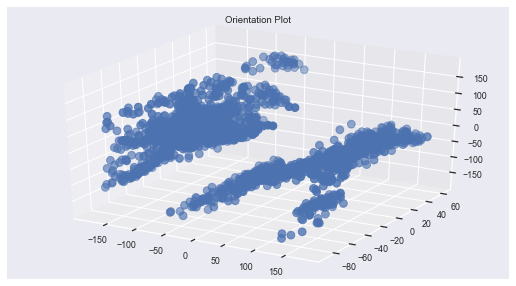

In [88]:
fig = plt.figure(figsize=(9,5))

ax = plt.axes(projection='3d')
zline = master_df['Orin_Z']
xline = master_df['Orin_X']
yline = master_df['Orin_Y']
ax.scatter3D(xline, yline, zline, cmap='rainbow',s=60);
plt.title('Orientation Plot')
plt.show()

From the orientation plot above, it will be seen clearly that the points seperated themselves into three while one of the branches seemed to have splitted into two aswell, in as much as this plot doesn't clearly show which activity is taking place, the graphic representation shows up interesting activities and points to the direction for the data to be further used for machine learning.

In [89]:
#line plot for Acceleration

In [90]:
title='Acceleration'
ylabel='m/s2'
xlabel='Data point'

ax5 = master_df['Acc_X'].plot(figsize=(16,7),legend=True)
ax5 = master_df['Acc_Y'].plot(figsize=(16,7),legend=True)
ax5 = master_df['Acc_Z'].plot(figsize=(16,7),legend=True)



ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

the line plot for accereration shows that there is a spike in the activity above 0 point and the activty  where there is more movement must have contibuted to this.

In [91]:
#line plot for Angular Velocity

In [92]:
title='Angular Velocity'
ylabel='m/s2'
xlabel='Data point'

ax5 = master_df['AngV_X'].plot(figsize=(16,7),legend=True)
ax5 = master_df['AngV_Y'].plot(figsize=(16,7),legend=True)
ax5 = master_df['AngV_Z'].plot(figsize=(16,7),legend=True)



ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

the line plot for Angular Velocity shows that there isn't much of an activty going on fro 0 to around 2500 in the data point axis, but there came a big soike and clustered activity from that point till the end which gets to shows that there may be a simlilar activity taking place at these points

In [93]:
#line plot for Magnetic field

In [94]:
title='Magnetic Field'
ylabel='m/s2'
xlabel='Data point'

ax5 = master_df['Mag_X'].plot(figsize=(16,7),legend=True)
ax5 = master_df['Mag_Y'].plot(figsize=(16,7),legend=True)
ax5 = master_df['Mag_Z'].plot(figsize=(16,7),legend=True)

ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

From the Magnetic linr plot above, each of the Mag axis seems to operate on it own until it got to point of about 2500 in the data point, the the three became more active and clusterd against each other, being that no clear prediction can be made at thispoint, this take the data further for machine learning

In [95]:
#line plot for Orientation

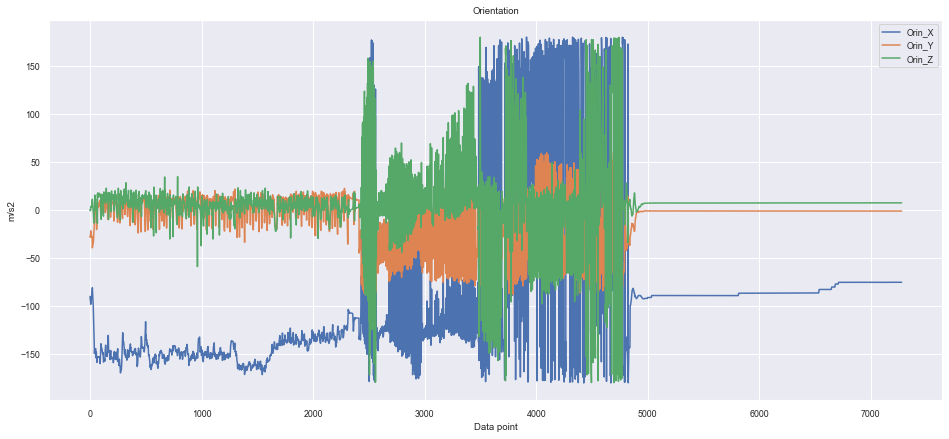

In [96]:
title='Orientation'
ylabel='m/s2'
xlabel='Data point'

ax5 = master_df['Orin_X'].plot(figsize=(16,7),legend=True)
ax5 = master_df['Orin_Y'].plot(figsize=(16,7),legend=True)
ax5 = master_df['Orin_Z'].plot(figsize=(16,7),legend=True)

ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

From the orientation line plot above, the Orin_Y and Z seemed to have operated from same point while Orin_Z started off from around -70, however the three axis had a spike and more movement occured from around 2500 on the data point.

In [97]:
#exporting the master df to the directory so as to have a saved grouped data
master_df.to_csv('Grouped_Activities.csv')

the master data frame has now been exported and saved while the data is further analysed.

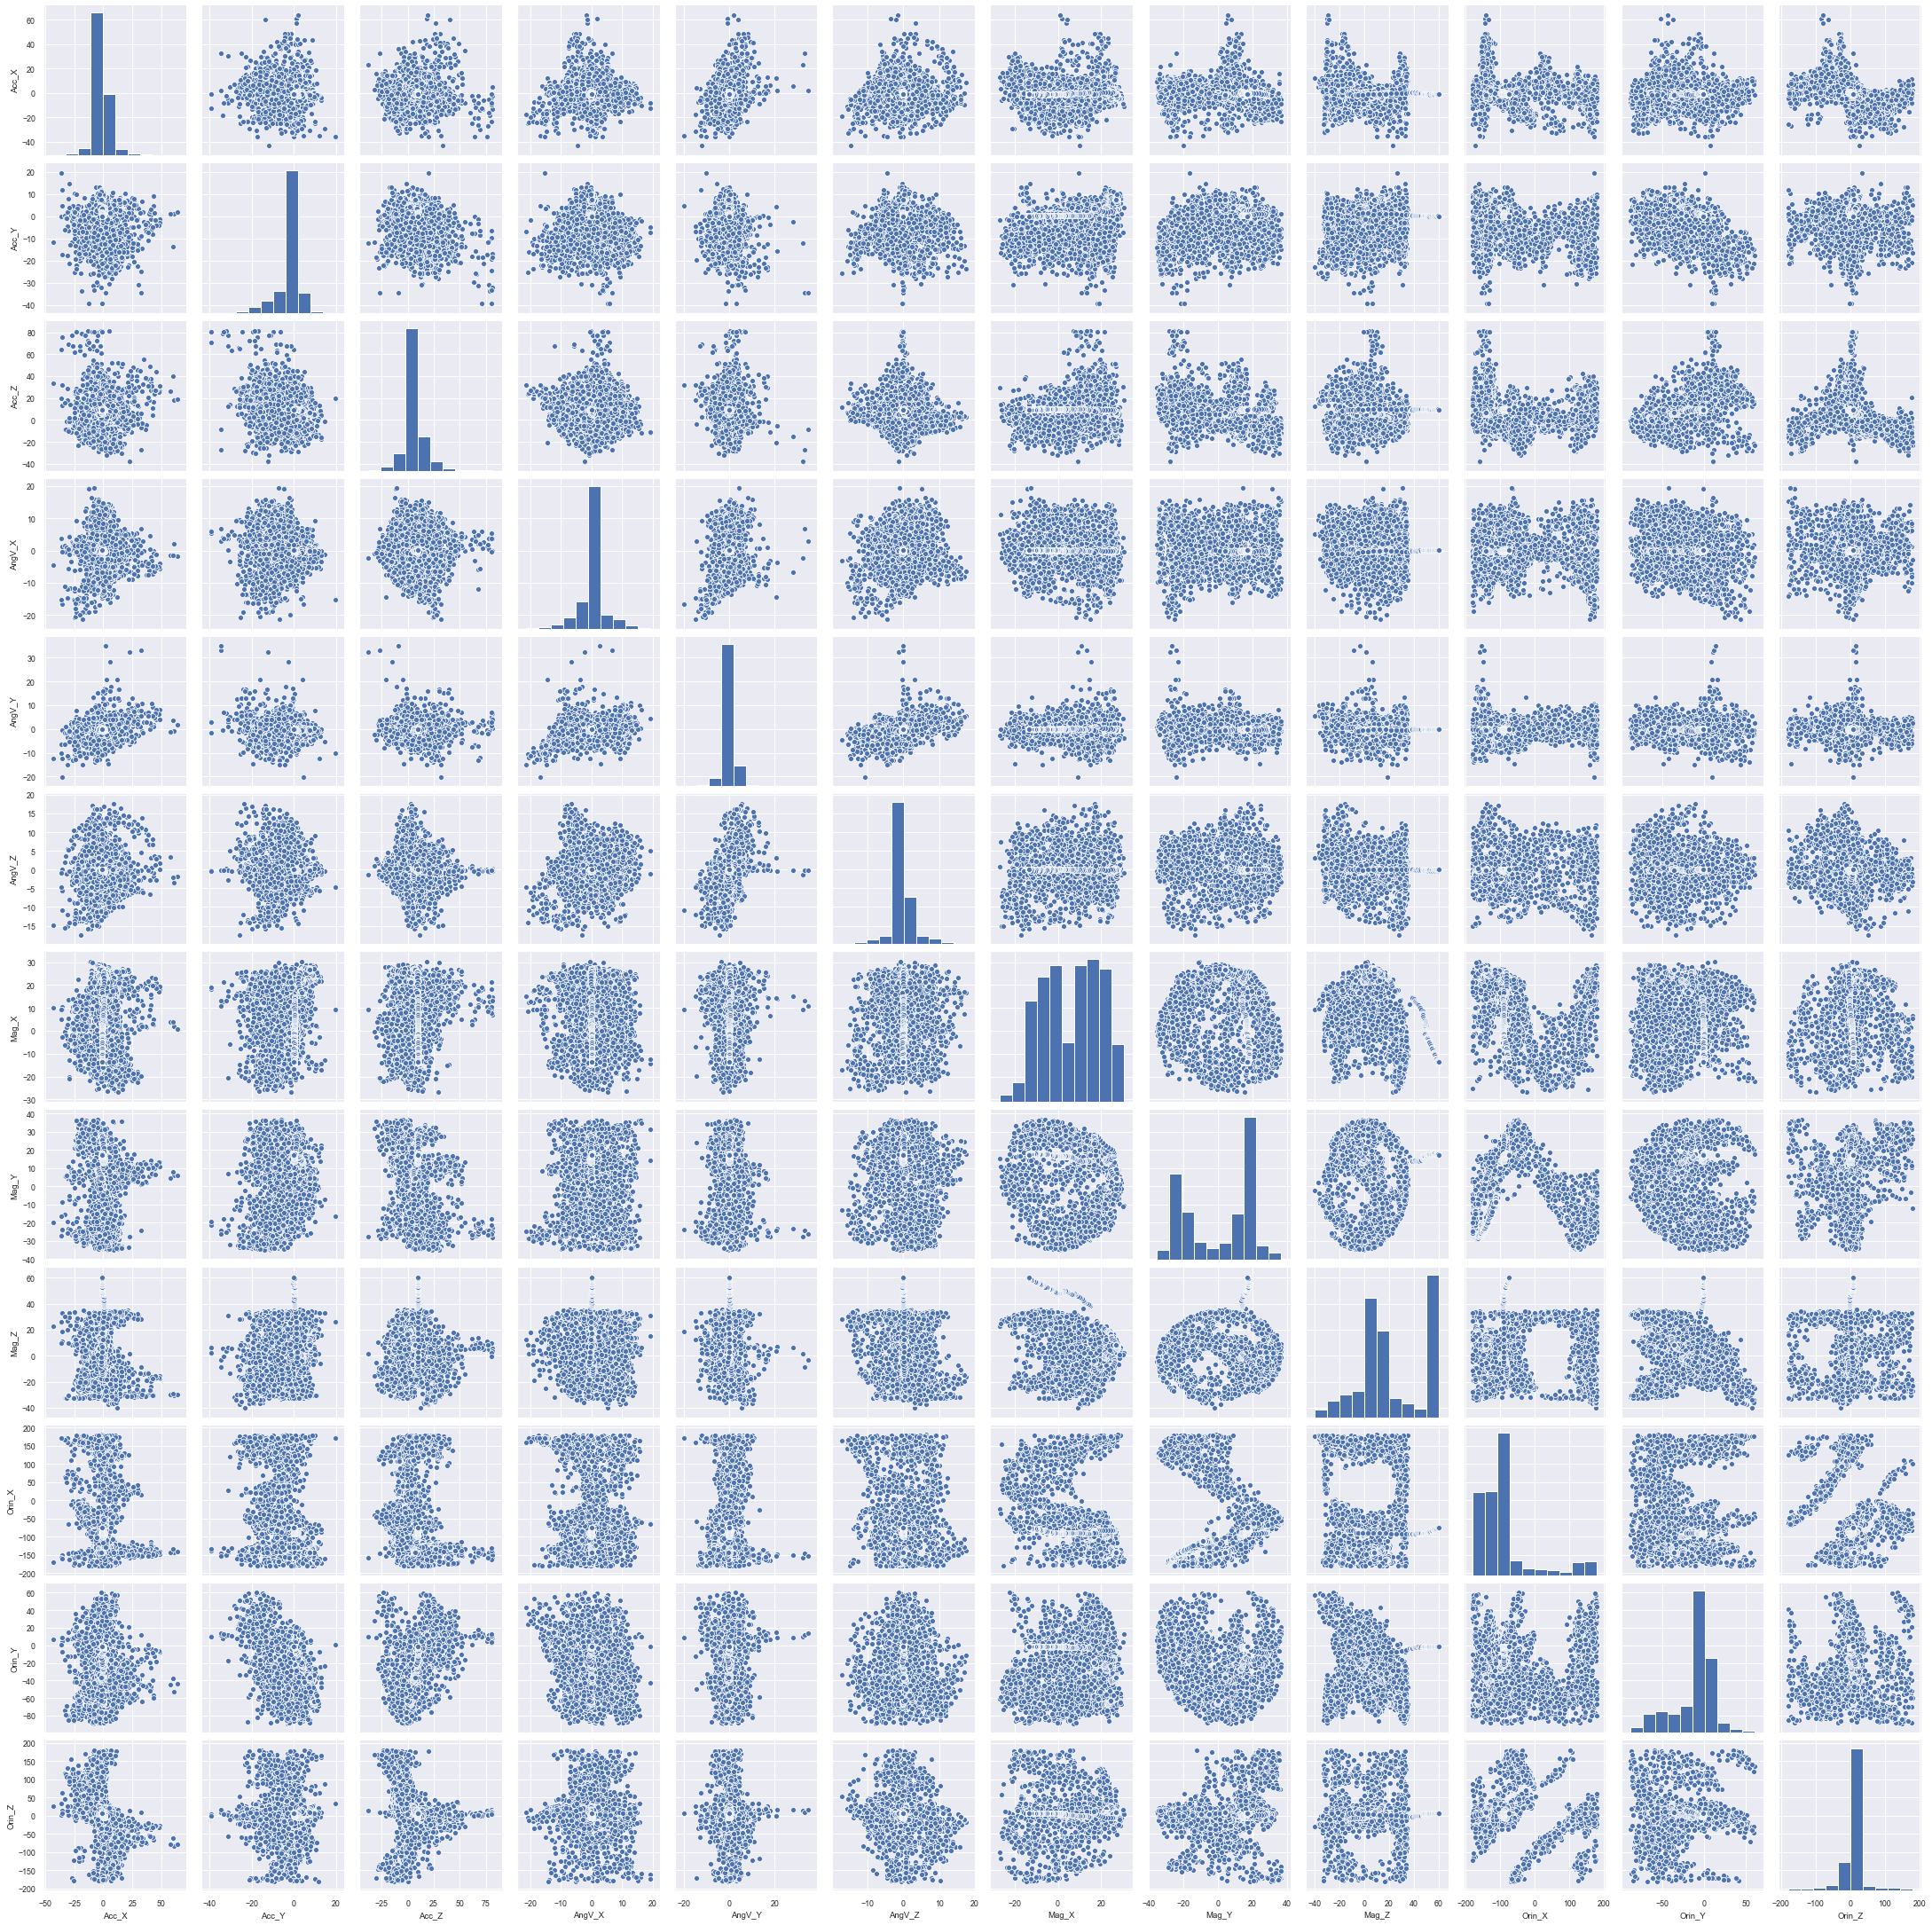

In [98]:
#plotting the sns plot
sns.pairplot(master_df)

The pair plot shows that there is no correlation between the variables as no relationship could be established between two variables. this shows that the data reflects its independence and is all good for machine learning.

# USING THE GROUPED DATA TO BUILD A MODEL FOR MACHINE LEARNING TO DETECT HUMAN ACTIVITY.

# Predicting Human Activity Using Machine Learning

Human activities are different and various actions carried out by people on a daily basis. this basically makes up what humans do in getting other jobs done.

The approach to this project would be:
1. Problem definition

2.Data

3. Evaluation
4. Features
5. Modelling
6. Experimentation

# 1. Problem definition
using different sensor data activities , can it be used to predict human activity? 

# 2. Data
human activity data was collected using sensor with smart phone

# 3. Evaluation
Data will be evaluated and further decisions made on predicting at least 90% accuracy for human activity

# 4. Feature
This shows the information about the data features

i. Acceleration: This is the rate of change of the velocity of an object with respect to time(Wikipedia Contributors, 2019).

ii. Angular velocity: this explains how fast an object rotates around a point (Wikipedia Contributors, 2019).

iii. Magnetic Field:This explains the magnetic influence on movement of electric currents and charges ((Wikipedia Contributors, 2019).

iv. Orientation: Imaginary brotaion that is needed tomove an object from its reference posiyion to current position.(Wikipedia, 2021).
v. Activity: which of the human activity is being carried out (drop and pick up=1, shaking = 2, sitting=3)

In [99]:
#calling up the data set
master_df

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
0    2021-10-12 16:48:22.046  0.019759  4.468508  8.768915  0.328934   
1    2021-10-12 16:48:22.096  0.318837  4.683910  8.465047  0.187821   
2    2021-10-12 16:48:22.146  0.416883  4.603078  8.745264  0.110486   
3    2021-10-12 16:48:22.196 -0.167651  4.635111  9.079669  0.022287   
4    2021-10-12 16:48:22.245 -0.216899  4.424649  9.309890 -0.142323   
...                      ...       ...       ...       ...       ...   
7272 2021-10-12 16:42:27.689 -1.254841  0.188308  9.663155  0.007543   
7273 2021-10-12 16:42:27.739 -1.256936  0.196242  9.675130  0.006431   
7274 2021-10-12 16:42:27.789 -1.260229  0.193847  9.683513  0.006782   
7275 2021-10-12 16:42:27.839 -1.254691  0.191901  9.670939  0.008840   
7276 2021-10-12 16:42:27.888 -1.249003  0.071402  9.596095  0.007338   

        AngV_Y    AngV_Z      Mag_X      Mag_Y      Mag_Z     Orin_X  \
0    -0.157198  0.319977  25.285210  11.638275   2.919649 -89.927211   
1     0.009831  0.424637  25.446188  11.322353   2.863413 -91.270862   
2     0.276281  0.404375  25.559078  10.838833   2.730994 -92.631925   
3     0.118462  0.352483  25.685452  10.131504   3.091275 -93.813458   
4    -0.049034  0.242339  25.824631   9.739887   3.179871 -94.640750   
...        ...       ...        ...        ...        ...        ...   
7272  0.002132  0.003930 -13.455758  17.473938  59.677711 -75.209055   
7273  0.003111  0.006988 -13.350305  17.433907  59.778374 -75.207479   
7274  0.002981  0.007969 -13.431933  17.490631  59.838013 -75.209698   
7275  0.002525  0.005792 -13.431907  17.516876  59.896400 -75.208425   
7276  0.002817  0.006609 -13.434371  17.303093  60.112587 -75.207970   

         Orin_Y    Orin_Z         Activity  
0    -27.495348  0.297514  drop_and_pickup  
1    -28.043569 -0.402587  drop_and_pickup  
2    -28.396564 -0.338320  drop_and_pickup  
3    -28.433709 -0.432309  drop_and_pickup  
4    -28.065897 -0.816558  drop_and_pickup  
...         ...       ...              ...  
7272  -1.130628  7.397709          Sitting  
7273  -1.130067  7.396172          Sitting  
7274  -1.130081  7.397170          Sitting  
7275  -1.130816  7.397299          Sitting  
7276  -1.135194  7.398510          Sitting  

[7277 rows x 14 columns]

In [100]:
# to display all the columns of the dataframe in the notebook

pd.pandas.set_option('display.max_columns', None)

In [101]:
#using numbers to represent the activities in the data frame

map = {'drop_and_pickup': 1, 'Shaking' : 2, 'Sitting':3 }
master_df['Activity'] = master_df['Activity'].apply(lambda x: map[x])

master_df

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
0    2021-10-12 16:48:22.046  0.019759  4.468508  8.768915  0.328934   
1    2021-10-12 16:48:22.096  0.318837  4.683910  8.465047  0.187821   
2    2021-10-12 16:48:22.146  0.416883  4.603078  8.745264  0.110486   
3    2021-10-12 16:48:22.196 -0.167651  4.635111  9.079669  0.022287   
4    2021-10-12 16:48:22.245 -0.216899  4.424649  9.309890 -0.142323   
...                      ...       ...       ...       ...       ...   
7272 2021-10-12 16:42:27.689 -1.254841  0.188308  9.663155  0.007543   
7273 2021-10-12 16:42:27.739 -1.256936  0.196242  9.675130  0.006431   
7274 2021-10-12 16:42:27.789 -1.260229  0.193847  9.683513  0.006782   
7275 2021-10-12 16:42:27.839 -1.254691  0.191901  9.670939  0.008840   
7276 2021-10-12 16:42:27.888 -1.249003  0.071402  9.596095  0.007338   

        AngV_Y    AngV_Z      Mag_X      Mag_Y      Mag_Z     Orin_X  \
0    -0.157198  0.319977  25.285210  11.638275   2.919649 -89.927211   
1     0.009831  0.424637  25.446188  11.322353   2.863413 -91.270862   
2     0.276281  0.404375  25.559078  10.838833   2.730994 -92.631925   
3     0.118462  0.352483  25.685452  10.131504   3.091275 -93.813458   
4    -0.049034  0.242339  25.824631   9.739887   3.179871 -94.640750   
...        ...       ...        ...        ...        ...        ...   
7272  0.002132  0.003930 -13.455758  17.473938  59.677711 -75.209055   
7273  0.003111  0.006988 -13.350305  17.433907  59.778374 -75.207479   
7274  0.002981  0.007969 -13.431933  17.490631  59.838013 -75.209698   
7275  0.002525  0.005792 -13.431907  17.516876  59.896400 -75.208425   
7276  0.002817  0.006609 -13.434371  17.303093  60.112587 -75.207970   

         Orin_Y    Orin_Z  Activity  
0    -27.495348  0.297514         1  
1    -28.043569 -0.402587         1  
2    -28.396564 -0.338320         1  
3    -28.433709 -0.432309         1  
4    -28.065897 -0.816558         1  
...         ...       ...       ...  
7272  -1.130628  7.397709         3  
7273  -1.130067  7.396172         3  
7274  -1.130081  7.397170         3  
7275  -1.130816  7.397299         3  
7276  -1.135194  7.398510         3  

[7277 rows x 14 columns]

the representation of the Activity coulumn has changed, with 1 representing drop and pick up, 2 for Shaking and 3 for Sitting.

In [102]:
#calling the first and last five row

In [103]:
master_df.head()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X    AngV_Y  \
0 2021-10-12 16:48:22.046  0.019759  4.468508  8.768915  0.328934 -0.157198   
1 2021-10-12 16:48:22.096  0.318837  4.683910  8.465047  0.187821  0.009831   
2 2021-10-12 16:48:22.146  0.416883  4.603078  8.745264  0.110486  0.276281   
3 2021-10-12 16:48:22.196 -0.167651  4.635111  9.079669  0.022287  0.118462   
4 2021-10-12 16:48:22.245 -0.216899  4.424649  9.309890 -0.142323 -0.049034   

     AngV_Z      Mag_X      Mag_Y     Mag_Z     Orin_X     Orin_Y    Orin_Z  \
0  0.319977  25.285210  11.638275  2.919649 -89.927211 -27.495348  0.297514   
1  0.424637  25.446188  11.322353  2.863413 -91.270862 -28.043569 -0.402587   
2  0.404375  25.559078  10.838833  2.730994 -92.631925 -28.396564 -0.338320   
3  0.352483  25.685452  10.131504  3.091275 -93.813458 -28.433709 -0.432309   
4  0.242339  25.824631   9.739887  3.179871 -94.640750 -28.065897 -0.816558   

   Activity  
0         1  
1         1  
2         1  
3         1  
4         1

In [104]:
master_df.tail()

Timestamp     Acc_X     Acc_Y     Acc_Z    AngV_X  \
7272 2021-10-12 16:42:27.689 -1.254841  0.188308  9.663155  0.007543   
7273 2021-10-12 16:42:27.739 -1.256936  0.196242  9.675130  0.006431   
7274 2021-10-12 16:42:27.789 -1.260229  0.193847  9.683513  0.006782   
7275 2021-10-12 16:42:27.839 -1.254691  0.191901  9.670939  0.008840   
7276 2021-10-12 16:42:27.888 -1.249003  0.071402  9.596095  0.007338   

        AngV_Y    AngV_Z      Mag_X      Mag_Y      Mag_Z     Orin_X  \
7272  0.002132  0.003930 -13.455758  17.473938  59.677711 -75.209055   
7273  0.003111  0.006988 -13.350305  17.433907  59.778374 -75.207479   
7274  0.002981  0.007969 -13.431933  17.490631  59.838013 -75.209698   
7275  0.002525  0.005792 -13.431907  17.516876  59.896400 -75.208425   
7276  0.002817  0.006609 -13.434371  17.303093  60.112587 -75.207970   

        Orin_Y    Orin_Z  Activity  
7272 -1.130628  7.397709         3  
7273 -1.130067  7.396172         3  
7274 -1.130081  7.397170         3  
7275 -1.130816  7.397299         3  
7276 -1.135194  7.398510         3

In [105]:
# to work with a copy of the data while keeping the original copy of data
df = master_df.copy()

having made a copy of this data, the copy will be used for the anlysis and manipulation while keeping the original for reference purpose shouldthere mistake occur on the copy that was made.

In [106]:
#checking the info contained in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7277 entries, 0 to 7276
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  7277 non-null   datetime64[ns]
 1   Acc_X      7277 non-null   float64       
 2   Acc_Y      7277 non-null   float64       
 3   Acc_Z      7277 non-null   float64       
 4   AngV_X     7277 non-null   float64       
 5   AngV_Y     7277 non-null   float64       
 6   AngV_Z     7277 non-null   float64       
 7   Mag_X      7277 non-null   float64       
 8   Mag_Y      7277 non-null   float64       
 9   Mag_Z      7277 non-null   float64       
 10  Orin_X     7277 non-null   float64       
 11  Orin_Y     7277 non-null   float64       
 12  Orin_Z     7277 non-null   float64       
 13  Activity   7277 non-null   int64         
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 796.0 KB


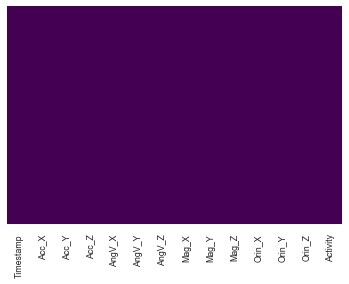

In [107]:
sns.heatmap(df.isna(),cmap="viridis", yticklabels=False,cbar=False);

info above shows that the data frame has 14 columns and 7277 rows, and there are no null value which makes the data ideal for machine learnin as null value has the tendency of affecting the model of our machine learning. The data type has a mixture of float and integers

In [108]:
#checking the columns
df.columns

Index(['Timestamp', 'Acc_X', 'Acc_Y', 'Acc_Z', 'AngV_X', 'AngV_Y', 'AngV_Z',
       'Mag_X', 'Mag_Y', 'Mag_Z', 'Orin_X', 'Orin_Y', 'Orin_Z', 'Activity'],
      dtype='object')

list above shows the title of each column contained in the data frame

In [109]:
#getting the shape of the data
df.shape

(7277, 14)

The shape of the data shows that there are 7277 rows and 14 columns in the data set

# checking the Activity variable so as to investigate the data contained in it

In [110]:
df["Activity"].value_counts()

3    2436
2    2429
1    2412
Name: Activity, dtype: int64

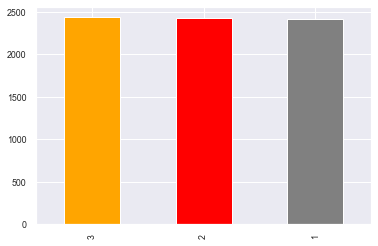

In [111]:
#representing the activity variable in a barchart
df["Activity"].value_counts().plot(kind="bar", color=["orange", "red", "gray"]);

bar chart shows that Sitting which 3 has the highest number with 2436, followed by Shaking and drop and pick with 2429 and 2412 simultaneoulsy. 

In [112]:
#describing the data statistically using the describe function
df.describe().T

count       mean        std         min         25%        50%  \
Acc_X     7277.0  -0.864822   6.549976  -43.351051   -1.599125  -1.228346   
Acc_Y     7277.0  -2.044605   5.583611  -39.427859   -2.656226   0.174088   
Acc_Z     7277.0   7.981674  10.262307  -37.760177    3.151546   9.651929   
AngV_X    7277.0   0.161361   4.117416  -21.282822   -0.430614   0.007299   
AngV_Y    7277.0   0.033544   2.512275  -20.119480   -0.460194   0.002357   
AngV_Z    7277.0   0.029370   3.167215  -17.386717   -0.220688   0.005318   
Mag_X     7277.0   5.927238  13.072518  -26.940784   -4.958540   7.897754   
Mag_Y     7277.0   0.713573  18.976752  -35.066772  -20.043953  10.003864   
Mag_Z     7277.0  21.519720  25.324793  -40.121155    6.634923  12.548479   
Orin_X    7277.0 -86.955502  79.237140 -179.976529 -140.589828 -89.070770   
Orin_Y    7277.0 -10.535004  25.186040  -88.908651  -19.004668  -1.087078   
Orin_Z    7277.0   5.142941  37.620716 -179.598219    1.941988   7.244158   
Activity  7277.0   2.003298   0.816265    1.000000    1.000000   2.000000   

                75%         max  
Acc_X     -0.044308   63.766796  
Acc_Y      0.196392   19.618503  
Acc_Z      9.698033   81.522124  
AngV_X     0.943268   19.249882  
AngV_Y     0.401960   34.849339  
AngV_Z     0.205931   17.576744  
Mag_X     17.426079   30.293022  
Mag_Y     17.375549   36.879105  
Mag_Z     50.835663   60.492714  
Orin_X   -75.291186  179.804102  
Orin_Y     3.652758   60.008959  
Orin_Z     8.927856  179.630823  
Activity   3.000000    3.000000

# carrying out some analysis, hence finding patterns in the data by comparing columns in the data

# making a correlation matrix

In [113]:
df.corr()

Acc_X     Acc_Y     Acc_Z    AngV_X    AngV_Y    AngV_Z  \
Acc_X     1.000000 -0.032017  0.019773  0.014957  0.269389  0.026524   
Acc_Y    -0.032017  1.000000 -0.295552 -0.075989 -0.072049 -0.009699   
Acc_Z     0.019773 -0.295552  1.000000  0.080736 -0.079297 -0.062057   
AngV_X    0.014957 -0.075989  0.080736  1.000000  0.205302  0.161760   
AngV_Y    0.269389 -0.072049 -0.079297  0.205302  1.000000  0.414662   
AngV_Z    0.026524 -0.009699 -0.062057  0.161760  0.414662  1.000000   
Mag_X     0.041481  0.051586  0.016705 -0.029874 -0.005653  0.036306   
Mag_Y    -0.007094  0.067052 -0.114632 -0.010775 -0.029521 -0.020050   
Mag_Z    -0.022399  0.317062  0.080908 -0.038350 -0.064118 -0.060534   
Orin_X   -0.057623 -0.385921 -0.090376  0.079974  0.034873  0.012871   
Orin_Y   -0.069388 -0.147846  0.462361 -0.137587 -0.065559 -0.018225   
Orin_Z   -0.423507  0.050915 -0.092843  0.028845 -0.110555 -0.120786   
Activity  0.007515  0.075310  0.035791 -0.001111 -0.000921 -0.003787   

             Mag_X     Mag_Y     Mag_Z    Orin_X    Orin_Y    Orin_Z  Activity  
Acc_X     0.041481 -0.007094 -0.022399 -0.057623 -0.069388 -0.423507  0.007515  
Acc_Y     0.051586  0.067052  0.317062 -0.385921 -0.147846  0.050915  0.075310  
Acc_Z     0.016705 -0.114632  0.080908 -0.090376  0.462361 -0.092843  0.035791  
AngV_X   -0.029874 -0.010775 -0.038350  0.079974 -0.137587  0.028845 -0.001111  
AngV_Y   -0.005653 -0.029521 -0.064118  0.034873 -0.065559 -0.110555 -0.000921  
AngV_Z    0.036306 -0.020050 -0.060534  0.012871 -0.018225 -0.120786 -0.003787  
Mag_X     1.000000 -0.440281 -0.670843 -0.326541 -0.060728  0.062161 -0.638576  
Mag_Y    -0.440281  1.000000  0.435661  0.073858 -0.217989  0.134565  0.812036  
Mag_Z    -0.670843  0.435661  1.000000 -0.008535  0.228815  0.028364  0.679812  
Orin_X   -0.326541  0.073858 -0.008535  1.000000 -0.267479 -0.131818  0.306345  
Orin_Y   -0.060728 -0.217989  0.228815 -0.267479  1.000000  0.055253 -0.051250  
Orin_Z    0.062161  0.134565  0.028364 -0.131818  0.055253  1.000000  0.024524  
Activity -0.638576  0.812036  0.679812  0.306345 -0.051250  0.024524  1.000000

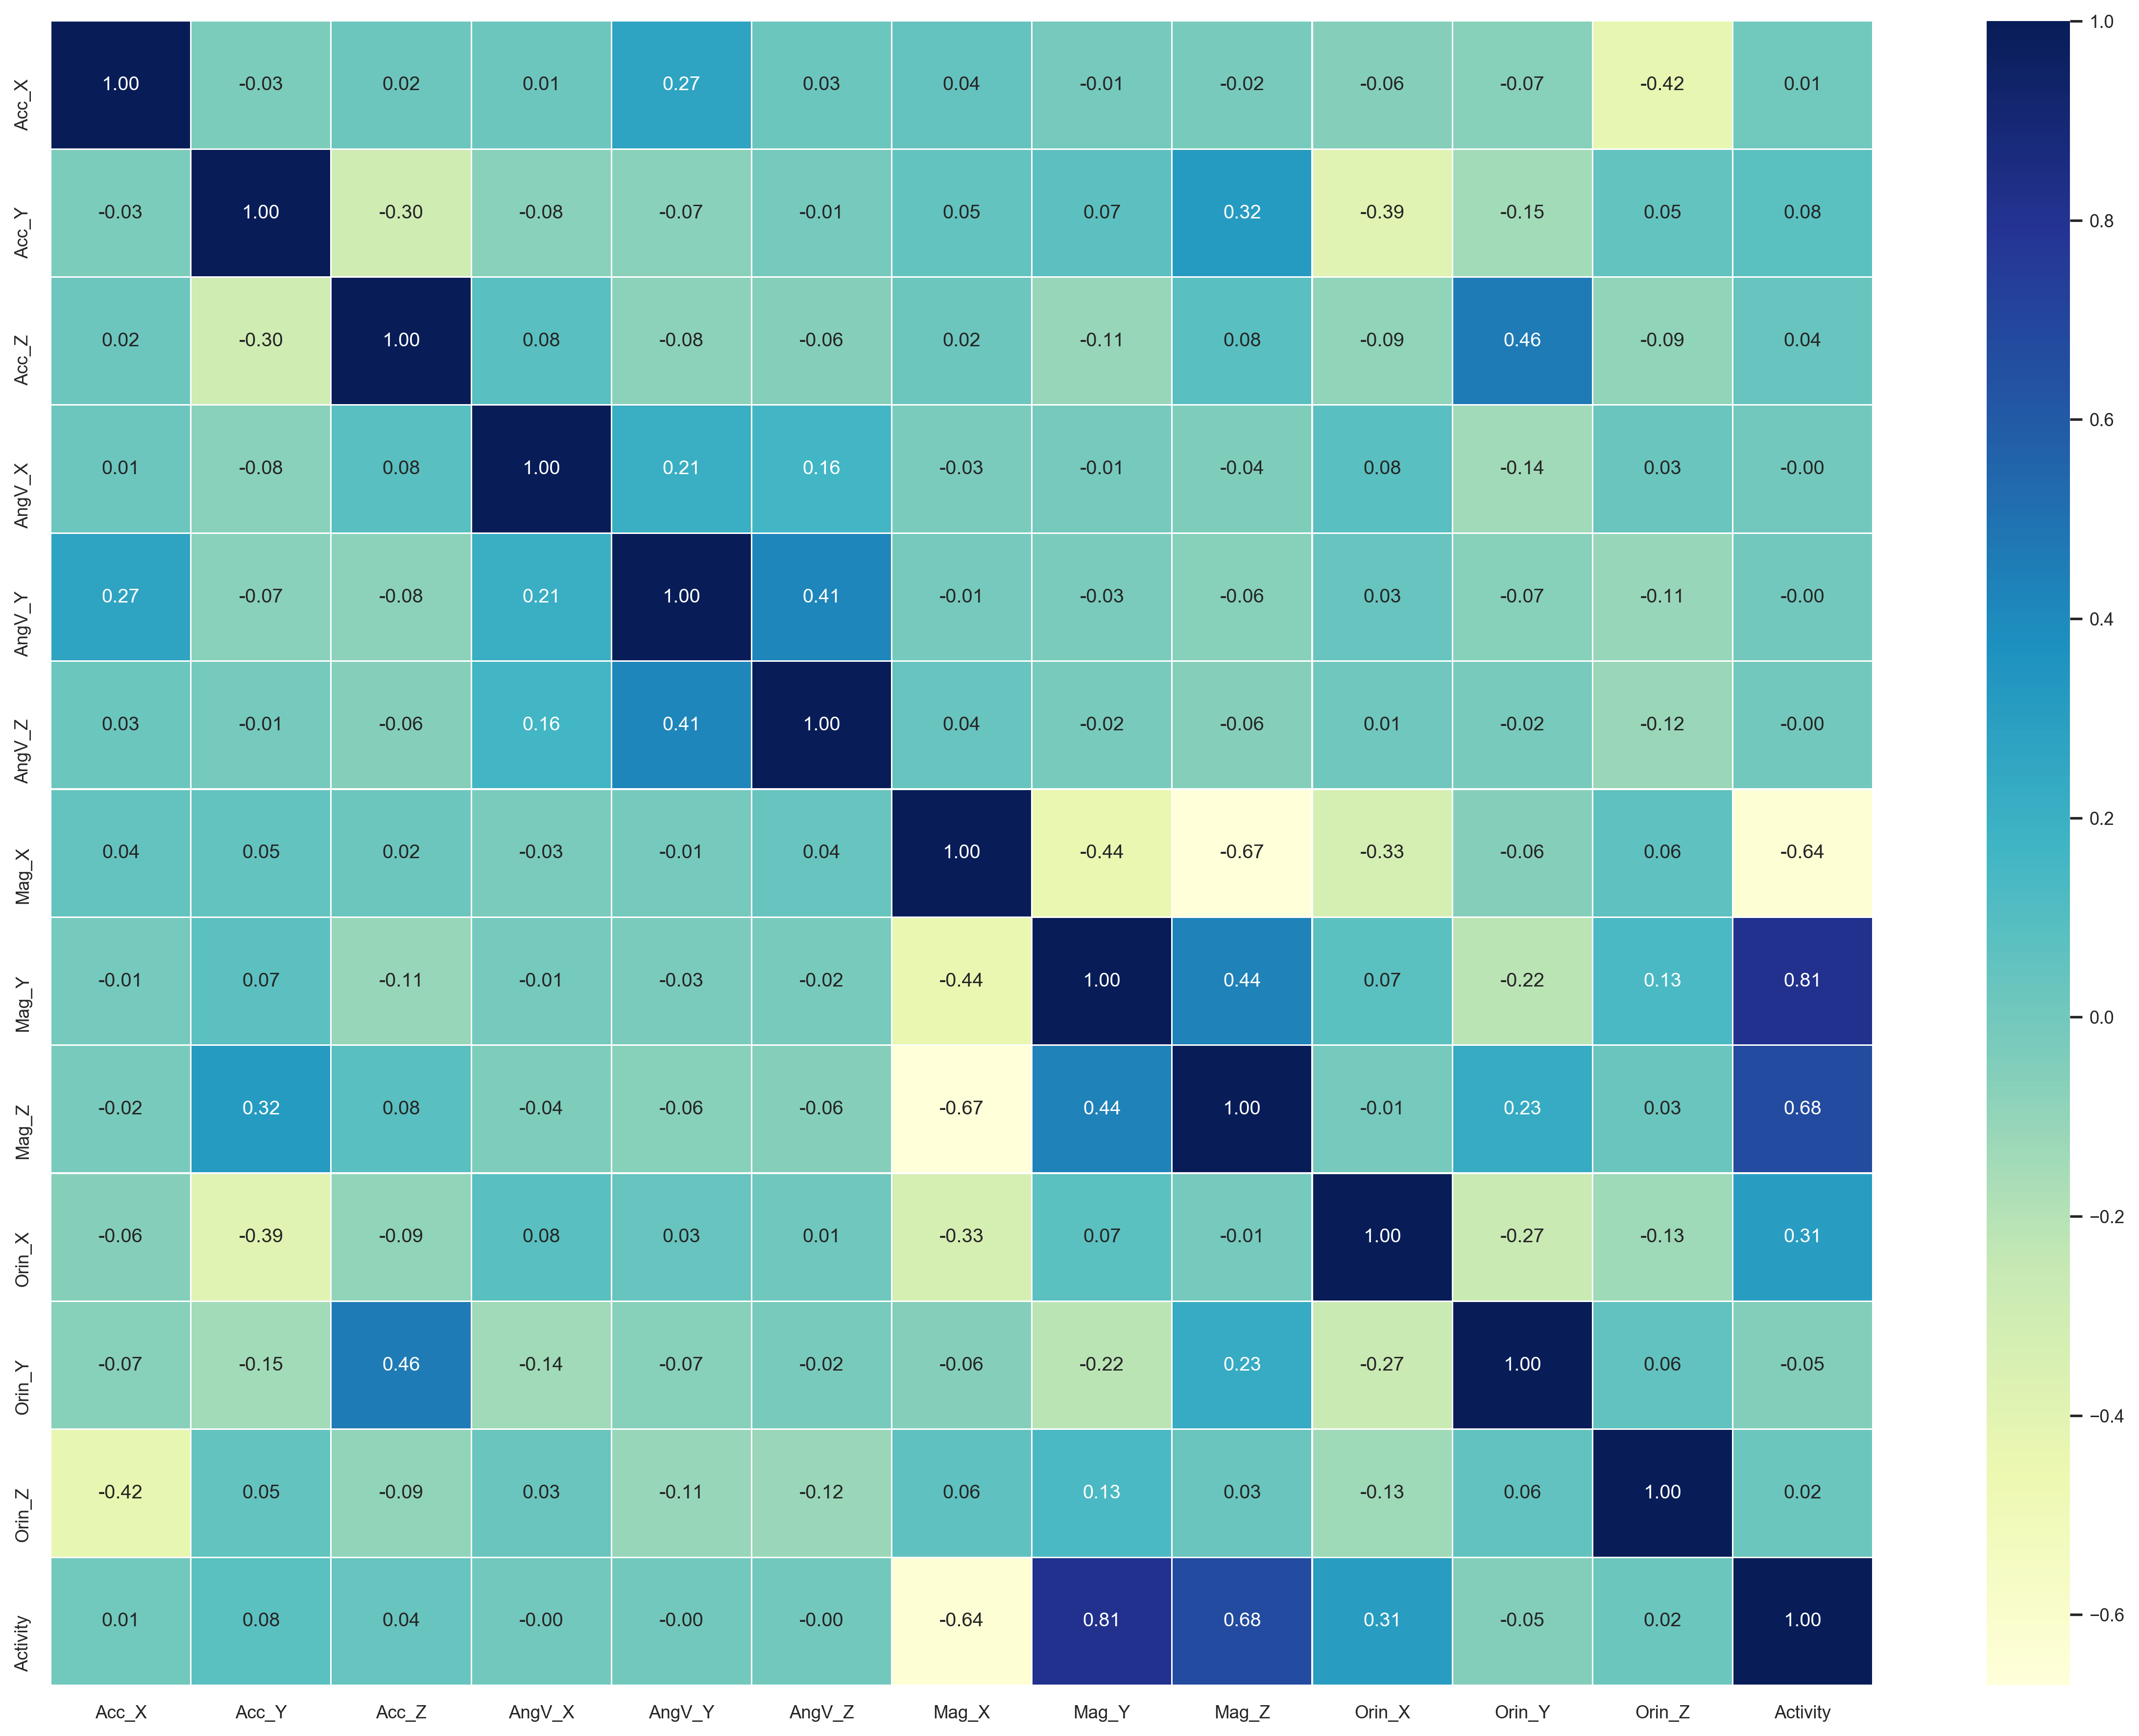

In [114]:
#enhancing the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20,15),dpi=300)
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

#***just incase it cuts off for older versions of Matplotlib
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

Plot above quantifies the correlation between the variables, and Result showed that the data has no strong correlation as the data variables are independent of each other.

# Building the Model

In [115]:
#dropping the Timestamp column which is string
df = df.drop("Timestamp",axis=1)

# splitting X and Y

In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Activity_class = le.fit_transform(df['Activity'])

the data set is grouped into two, all variables goes into X while the Activity goes into y.

In [117]:
X= df.drop("Activity",axis=1)
y = df["Activity"]

# Split data into train test split. Using scikit-learn

In [118]:
# Set random seed
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

the train set contains 80% of the data set while the test set contains 20% of the data set

In [119]:
print(f"""
x_train shape: {X_train.shape}, 
y_train shape: {y_train.shape},
X_test shape: {X_test.shape},
y_test shape: {y_test.shape}
""" )


x_train shape: (5821, 12), 
y_train shape: (5821,),
X_test shape: (1456, 12),
y_test shape: (1456,)



# Scalling the data

In [120]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [121]:
X_train

array([[-3.07479143, -0.54928307,  0.2286633 , ...,  0.9327157 ,
        -1.32913598,  0.83043197],
       [ 0.17370511, -2.78273221, -0.15276211, ...,  1.36928535,
        -0.88548797, -1.84552294],
       [-0.06327342,  0.4024701 ,  0.17802303, ...,  0.1415877 ,
         0.37243066,  0.06447885],
       ...,
       [-0.05798242,  0.39904009,  0.17649521, ..., -0.03120615,
         0.37514735,  0.06049122],
       [ 0.26001696,  0.77939566, -0.53548039, ..., -0.74449418,
         0.11086186, -0.29816865],
       [-0.06157193,  0.40175212,  0.17728851, ...,  0.14205504,
         0.37227766,  0.0645179 ]])

In [122]:
y_train

2887    2
4410    2
7183    3
4800    2
7078    3
       ..
5191    3
5226    3
5390    3
860     1
7270    3
Name: Activity, Length: 5821, dtype: int64

# having splitted the data into train and test set, next is building the machine model

    i, the train set will be trained and the patterns noted while
    ii, the patterns will be tested on the test set.
    
### Three different machine learning models will be apllied:
### 1. Logistic Regression
### 2. K-nearest Neighbours classifier
### 3. Random Forest Classifier

In [123]:
# Putting Modeles in a Dictionary

models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Creating a Function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    This function is to fit and evaluate given machine learning moels.
    Models: a dictionary of different scikit-learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Setting Random seed
    np.random.seed(42)
    
    # Create a disctionary to keep model scores
    model_scores = {}
    
    # Looping through models
    for name, model in models.items():
        # fitting the model to the data
        model.fit(X_train, y_train)
        
        # Evaluating the mode l and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [124]:
model_scores = fit_and_score(models=models, 
                             X_train= X_train, 
                             X_test=X_test,
                            y_train= y_train,
                            y_test=y_test)

model_scores

{'Logistic Regression': 0.9835164835164835,
 'KNN': 0.9993131868131868,
 'Random Forest': 1.0}

the models result shows that a high accuracy was achieved with Random forest being the highest at 1, with KNN following at 0.9993 followed by Logistic Regression with 0.9835

# Comparing the Baseline Model

In [125]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])

model_compare

Logistic Regression       KNN  Random Forest
accuracy             0.983516  0.999313            1.0

# Comparing the Model

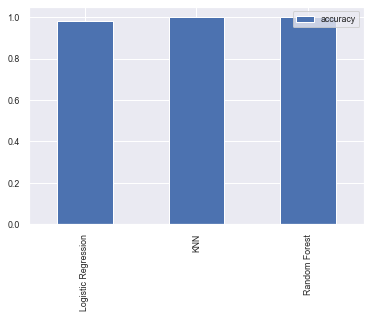

In [126]:
model_compare.T.plot.bar();

This shows the graphical representation of the model results.

# Having known the baseline model and being that the model's first predictions aren't always what to bank on, 

> **Next >>>**
_ the following will be further checked out:_
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report

### Creating hyperparameter space for the models 

In [127]:
# Creating a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 5, 20),
               "solver": ['liblinear','newton-cg']}

# Creating a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

# Creating a hyperparameter grid for KNN'
KNN_grid = {"n_neighbors": np.arange(3, 5, 9),
          "metric": ['euclidean', 'manhattan', 'minkowski'],
          "weights": ['uniform', 'distance']}

Having defined the hyperparameters/ setup for each of the models, they will be tuned using RandomizedSearchCV..

In [128]:
# Tuning LogisticRegression

np.random.seed(42)

# Setingup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)


# Fitting random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   22.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       7.84759970e-03, 2.33572147e-02, 6.95192796e-02, 2.06913808e-01,
       6.15848211e-01, 1.83298071e+00, 5.45559478e+00, 1.62377674e+01,
       4.83293024e+01, 1.43844989e+02, 4.28133240e+02, 1.27427499e+03,
       3.79269019e+0

# Checking  the best parameters

In [129]:
rs_log_reg.best_params_

{'solver': 'newton-cg', 'C': 33598.18286283774}

In [130]:
rs_log_reg.score(X_test, y_test)

0.9855769230769231

after tuning the logistic regression, an output result of 0.9855 was achieved compared to the initial model trained result which was at 0.9835, this shows that this algorithmhad a minimal improvement.it had computational time of 25.5 secs.

>###  Having tuned the LogisticRegression(), same will be done for RandomForestClassifier()...
### Tuning RandomForestClassifier()...

In [131]:
# Setup random seed
np.random.seed(42)

# Setup random hypyerparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model for randomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

# checking the best hyperparameters

In [132]:
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [133]:
# Evaluating the randomized search RandomForestClassifier Model
rs_rf.score(X_test, y_test)

0.9979395604395604

after tuning of the random Forest Classifier, an output result of 0.9979 was achieved compared to the initial model result which was at 1, this also shows that the tuning of the Random Forest algorithm did not improve the accuracy rather it reduced it.This had a computational time of 9.2 mins making it the longest. it has high computational cost

### Tuning Randomsearch for KNN

In [134]:
# Tuning KNN

np.random.seed(42)

# Setingup random hyperparameter search for KNN
KNN_run = RandomizedSearchCV(KNeighborsClassifier(),
                               param_distributions=KNN_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)


# Fitting random hyperparameter search model for LogisticRegression
KNN_run.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    6.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': array([3]),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=True)

In [135]:
KNN_run.best_params_

{'weights': 'uniform', 'n_neighbors': 3, 'metric': 'manhattan'}

In [136]:
KNN_run.score(X_test, y_test)

1.0

the accuracy result for KNN at 1 compared to the initial result of 0.9993 shows that the tuning of the hyperparameters improved the KNN algorithm. it has 5.2s computational time.

# Hyperparameter Tuning with GridSearchCV
#### applying the GridSearch on LogisticRegression model 

In [137]:
# Tuning LogisticRegression

np.random.seed(42)

# Setingup  hyperparameter search for LogisticRegression
GS_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                               verbose=1)
                               


# Fitting  hyperparameter search model for LogisticRegression
GS_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   35.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.9...
       7.84759970e-03, 2.33572147e-02, 6.95192796e-02, 2.06913808e-01,
       6.15848211e-01, 1.83298071e+00, 5.45559478e+00, 1.62377674e+01,
       4.83293024e+01, 1.43844989e+02, 4.28133240e+02, 1.27427499e+03,
       3.79269019e+03, 1.12883789e+04, 3.35981829e+04, 1.00000000e+05]),
      

In [138]:
GS_log_reg.best_params_

{'C': 5.455594781168514, 'solver': 'newton-cg'}

In [139]:
GS_log_reg.score(X_test, y_test)

0.9848901098901099

after tuning gridsearch on logistic regression, an output result of 0.9848 was achieved compared to 0.9855  that was gotten on the initial model result and 0.9835 acheved on the second, this shows that this algorithm did not improve but rather reduced.it had computational time of 33.4 secs.

### KNN gridsearch

In [140]:
# Tuning KNN

np.random.seed(42)

# Setingup random hyperparameter search for KNN
GS_KNN = GridSearchCV(KNeighborsClassifier(),
                               param_grid=KNN_grid,
                               cv=5,
                               verbose=True)


# Fitting random hyperparameter search model for LogisticRegression
GS_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([3]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [141]:
GS_KNN.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

In [142]:
GS_KNN.score(X_test, y_test)

1.0

the accuracy result shows 1, meaning that KNN after being tuned improved, it had a compuationl time 5.4s making it the fastest

### Grid search for Random Classifier 

In [143]:
rf_grid = {"n_estimators": [10, 50, 1000],
          "max_depth": [None, 3, 5, 10]}
          #"min_samples_split": np.arange(2, 20, 2),
          #"min_samples_leaf": np.arange(1, 20, 2)}


# Setup random seed
np.random.seed(42)

# Setup random hypyerparameter search for RandomForestClassifier
GS_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=5,
                          verbose=True)

# Fit random hyperparameter search model for randomForestClassifier()
GS_rf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [144]:
GS_rf.best_params_

{'max_depth': None, 'n_estimators': 50}

In [145]:
GS_rf.score(X_test, y_test)

0.9993131868131868

after tuning of the random Forest Classifier, an output result of 0.9991 was achieved, compared to 0.9979 achieved in the first tuning and 1 fromthe first model score, this shows that the tuning of the Random Forest algorithm did improve the accuracy score.This had a computational time of 4 mins. it has high computational cost.

# Evaluating the tuned machine learning classifier, beyond accuracy

* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score



*Based on the analysis, the base case predictions are good enough. Hyperparameter tunning didn't improve the outcome significantly. However, KNN model and logistic regression Randomsearch hyper parameter tuning score did improve a bit.Therefore, next is to proceed to evaluating the results of each moel using the base model for random forest only while KNN and logistic regression will use the best parameter achieved after hyperparameter tunning*

##### Making the predictions for the selected models would require fitting them first with any updated or improved parameters before making predictions and evaluations 

In [146]:
### fitting the new gridsearch KNN to train data and then predict with test data 
np.random.seed(42)

KNN_GS_fit = KNeighborsClassifier( n_neighbors=3, 
                                  weights='uniform', 
                                  metric='manhattan')  # adding the suggested Gridsearch best parameters

KNN_update = KNN_GS_fit.fit(X_train, y_train)

In [147]:
np.random.seed(42)

### fitting logistics using the base fitting parameters
logis_base = LogisticRegression(solver='newton-cg',C=33598.18286283774).fit(X_train, y_train)

In [148]:
### fitting random forest using the base fitting parameters
np.random.seed(42)
RF_base = RandomForestClassifier().fit(X_train, y_train)

### Writing a function to evaluate the final models together 

In [149]:
models_final = {"Logistic Regression": logis_base,
         "KNN": KNN_update,
         "Random Forest": RF_base}

def scores (models_final, X_test, y_test):
    
    """
    Function to calculate the score for each of the final model considerd for further evaluation 
    """
    np.random.seed(42)
    # Create a disctionary to keep model scores
    model_scores = {}
    
    for name, model in models_final.items():
        # Evaluate the mode l and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [150]:
model_final_scores = scores (models_final=models_final, X_test=X_test, y_test=y_test)

model_final_scores

{'Logistic Regression': 0.9855769230769231, 'KNN': 1.0, 'Random Forest': 1.0}

the updated models had a slightly improved score compared to the first model score with KNN and Random Forest being the highest at 1 while logistic regression had 0.9855

### Predicting with test data 

In [151]:
logis_2 = logis_base.predict(X_test)
KNN_new = KNN_update.predict(X_test)  
RF_2 = RF_base.predict(X_test)

### Generating Confusion matrix for each model considered

In [152]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,  # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label")      # true labels go on the y-axis 

#### confusion matrix for Logistic regression 

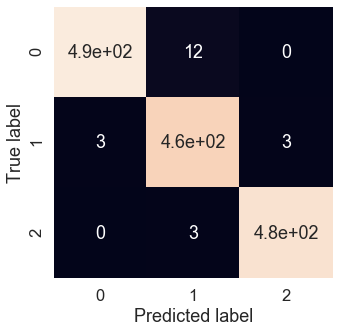

In [153]:
plot_conf_mat(y_test, logis_2)

plot above shows that there was some falling out of values in logistic regression algorithm, for the class 0, 490 valueswere predicted right while 3 was not,for the class 1, 460 was predicted right while 15 was not,then for class 2, 480 values were predicted right while 3 was not. this computation resulted to the outcome of 0.9855

#### confusion matrix for KNN

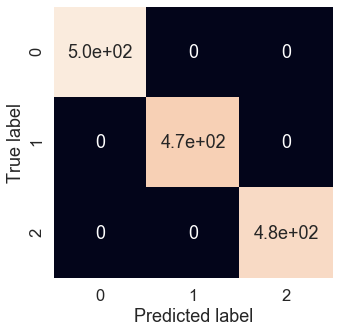

In [154]:
plot_conf_mat(y_test, KNN_new)

this plot shows that there was no faling out as the expected value matched with the predicted value, this gave rise to the models score 0f 1 

#### confusion matrix for Random Forest 

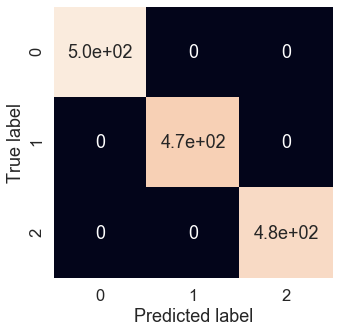

In [155]:
plot_conf_mat(y_test, RF_2)

this plot shows that there was no faling out as the expected value matched with the predicted value, this gave rise to the models score of 1 .

# Having gotten the confusion matrix, next is proceeding to get a classification report as well as cross-validated precision, recall and f1-score.

# Classification Report

#### Classification Report for logistic regression 

In [156]:
print(classification_report(y_test,logis_2))

              precision    recall  f1-score   support

           1       0.99      0.98      0.99       505
           2       0.97      0.99      0.98       468
           3       0.99      0.99      0.99       483

    accuracy                           0.99      1456
   macro avg       0.99      0.99      0.99      1456
weighted avg       0.99      0.99      0.99      1456



evaluation of the precision, recall and F1-Score gave an average score of 0.99, weighted avg of 0.99, macro avg of 0.99 and a support score of 1456.

#### Classification Report for KNN

In [157]:
print(classification_report(y_test,KNN_new))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       505
           2       1.00      1.00      1.00       468
           3       1.00      1.00      1.00       483

    accuracy                           1.00      1456
   macro avg       1.00      1.00      1.00      1456
weighted avg       1.00      1.00      1.00      1456



evaluation of the precision, recall and F1-Score gave an average score of 1,weighted avg of 1, macro avg of 1 and support score of 1456

#### Classification Report for Random Forest 

In [158]:
print(classification_report(y_test,RF_2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       505
           2       1.00      1.00      1.00       468
           3       1.00      1.00      1.00       483

    accuracy                           1.00      1456
   macro avg       1.00      1.00      1.00      1456
weighted avg       1.00      1.00      1.00      1456



evaluation of the precision, recall and F1-Score gave an average score of 1,weighted avg of 1, macro avg of 1 and support score of 1456

# Feature Importance
    finding out which of these features 'acceleration', 'Angular Velocity', 'Magnetic Fiel', 'Orientation', contibutes the most in predicting human activity.
    
Feature importance is also a way of knowing, "which features contributed most to the outcomes of the model and how did they contribute?"¶

# finding the feature importance for LogisticRegression model...

In [159]:
df.head(3)

Acc_X     Acc_Y     Acc_Z    AngV_X    AngV_Y    AngV_Z      Mag_X  \
0  0.019759  4.468508  8.768915  0.328934 -0.157198  0.319977  25.285210   
1  0.318837  4.683910  8.465047  0.187821  0.009831  0.424637  25.446188   
2  0.416883  4.603078  8.745264  0.110486  0.276281  0.404375  25.559078   

       Mag_Y     Mag_Z     Orin_X     Orin_Y    Orin_Z  Activity  
0  11.638275  2.919649 -89.927211 -27.495348  0.297514         1  
1  11.322353  2.863413 -91.270862 -28.043569 -0.402587         1  
2  10.838833  2.730994 -92.631925 -28.396564 -0.338320         1

In [160]:
# Check coeficients (coef)
logis_base.coef_

array([[-1.16805460e-01, -1.04505833e+00, -5.19491502e-01,
         3.40969082e-01,  4.15826095e-01, -3.56225414e-01,
        -2.38823004e-01, -5.98294920e+00,  6.81794947e-01,
        -1.88012257e+00,  6.53511828e-03, -6.48214055e-01],
       [-3.07550003e-01, -2.32251328e+00, -6.11994228e-01,
         8.91877239e-02, -3.64990004e-01, -1.33643911e-01,
        -2.04381045e+00, -2.36777369e+00, -4.09439800e+00,
        -5.93664014e-01, -2.69740228e+00,  5.87261237e-01],
       [ 4.24355463e-01,  3.36757161e+00,  1.13148573e+00,
        -4.30156806e-01, -5.08360912e-02,  4.89869325e-01,
         2.28263345e+00,  8.35072289e+00,  3.41260305e+00,
         2.47378659e+00,  2.69086717e+00,  6.09528175e-02]])

In [161]:
# Matching coef's of features to columns
feature_dict = dict(zip(df.columns, list(logis_base.coef_[0])))
feature_dict

{'Acc_X': -0.11680546044502375,
 'Acc_Y': -1.045058328710351,
 'Acc_Z': -0.5194915017363296,
 'AngV_X': 0.3409690824514796,
 'AngV_Y': 0.4158260952737928,
 'AngV_Z': -0.35622541400010993,
 'Mag_X': -0.23882300350658978,
 'Mag_Y': -5.982949199622741,
 'Mag_Z': 0.6817949468415051,
 'Orin_X': -1.8801225740031329,
 'Orin_Y': 0.006535118279165613,
 'Orin_Z': -0.6482140549464671}

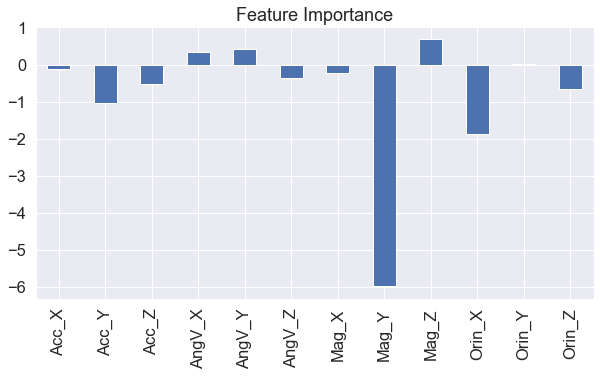

In [162]:
# Visualizing feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])


feature_df.T.plot.bar(title="Feature Importance",figsize=(10,5),legend=False);

Mag Y has the highest weight at about -6, and contributed more to the prediction of the human activity.

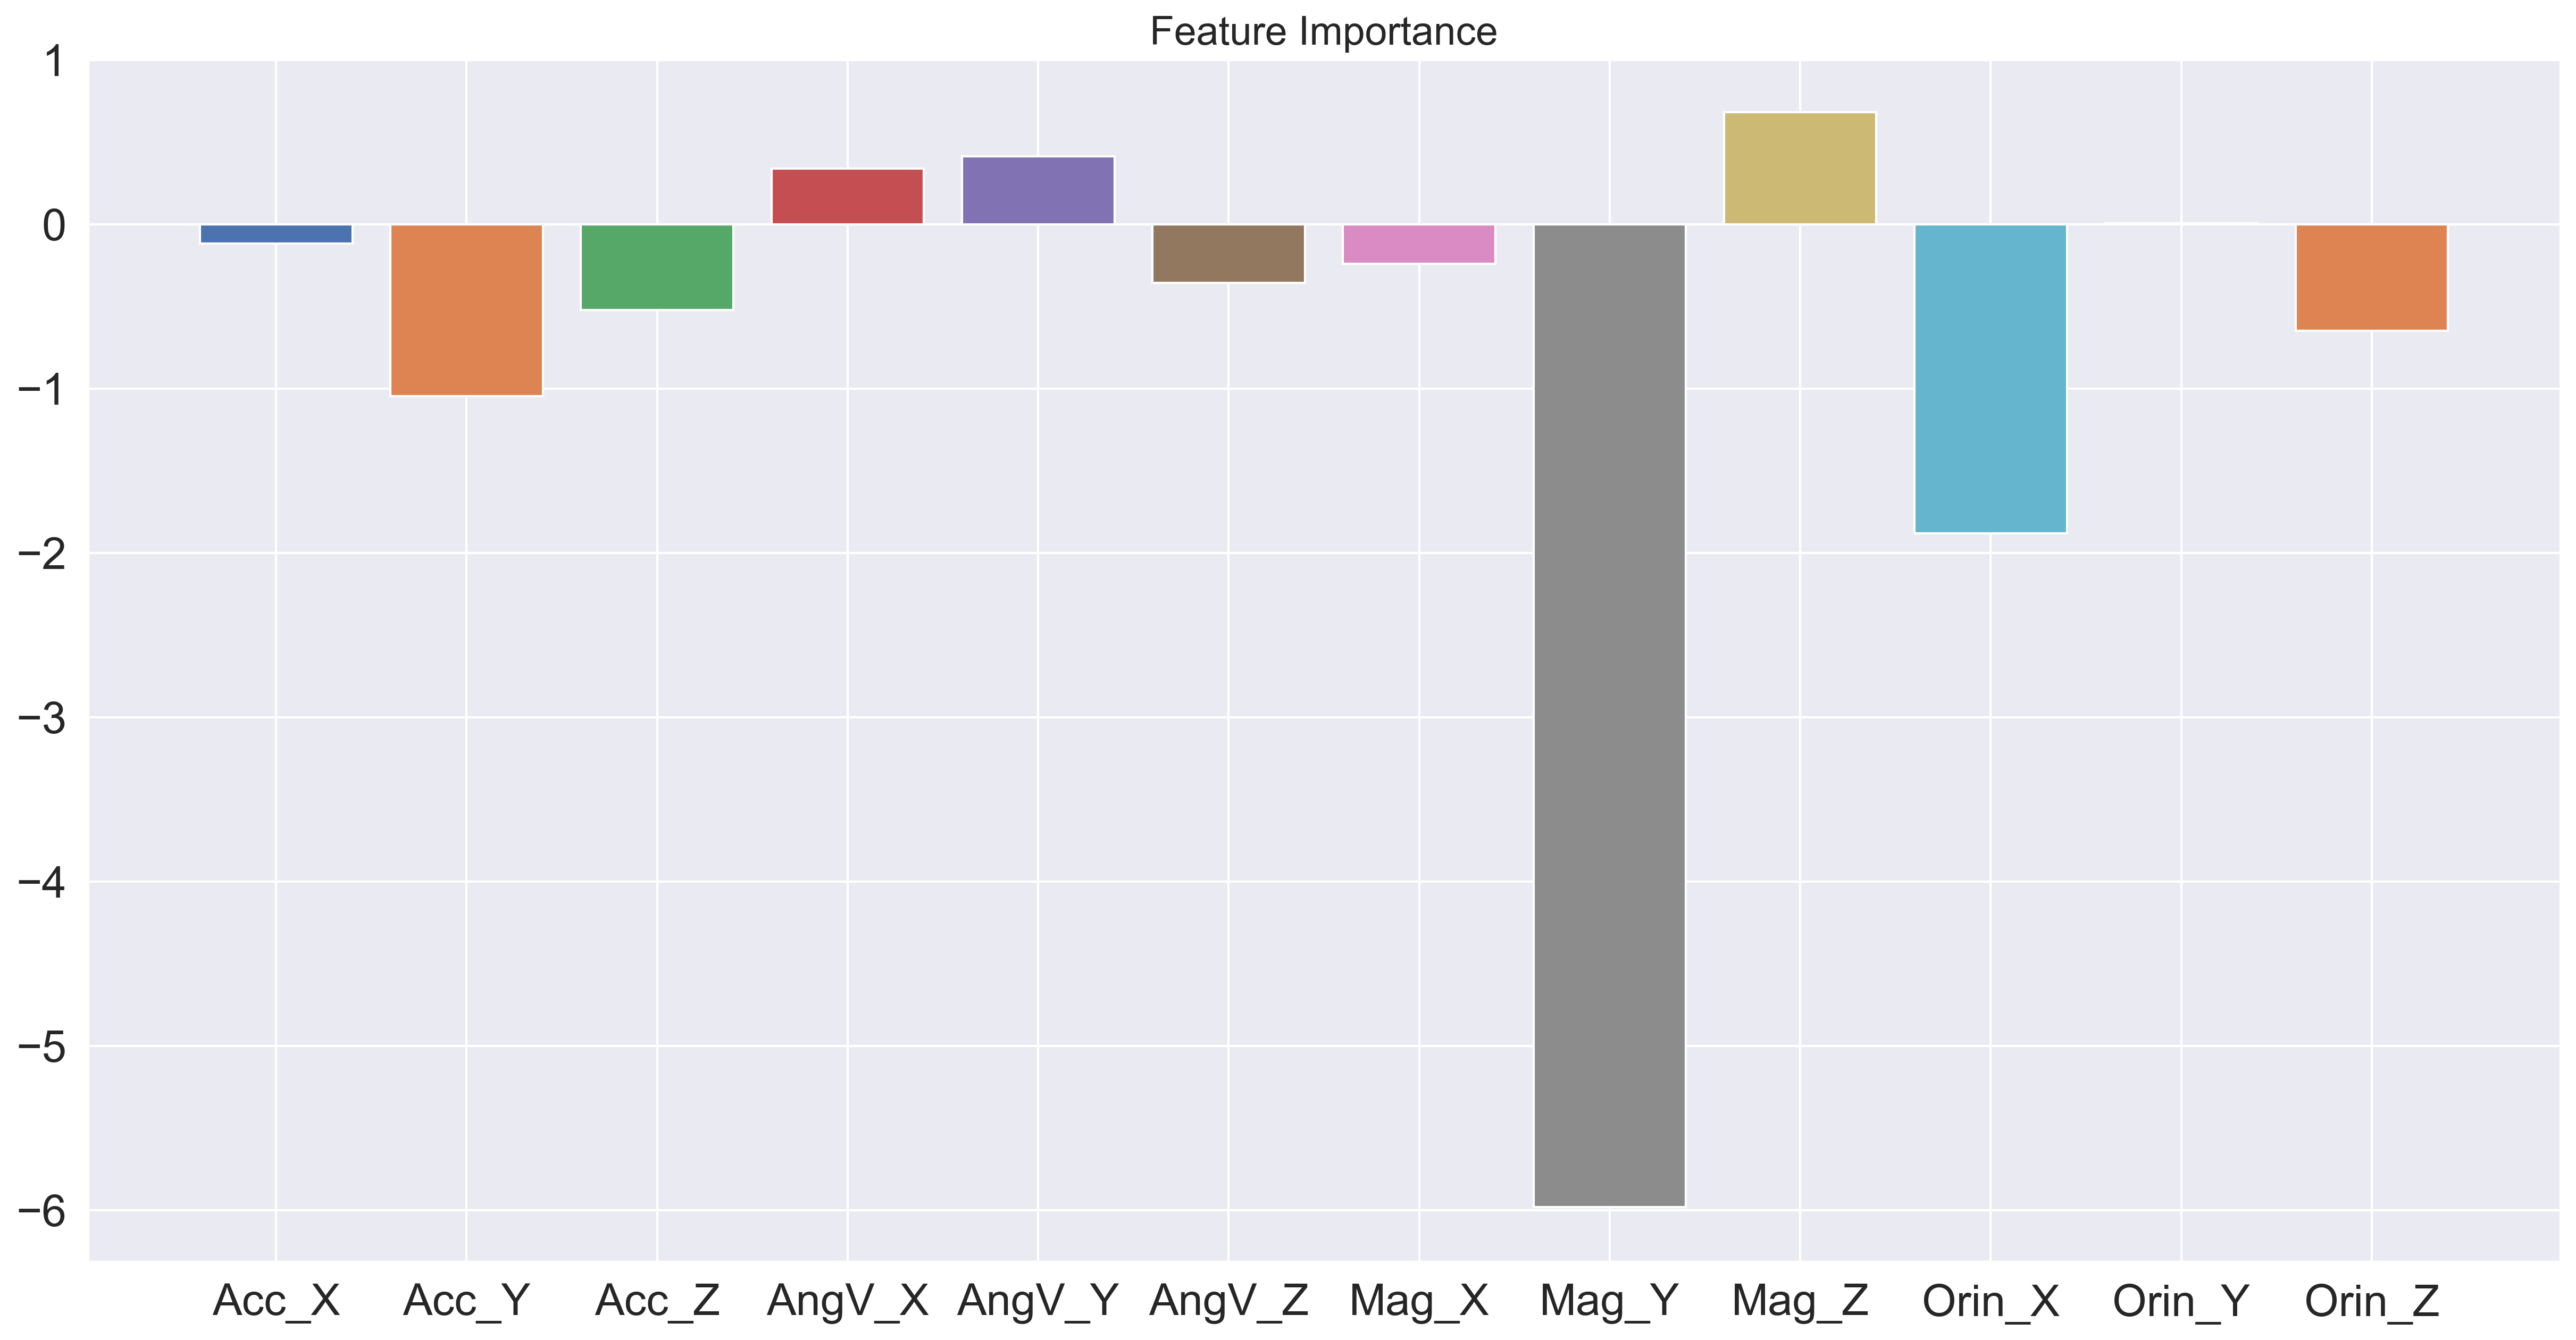

In [163]:
#Larger plot showing "Feature Importance"
plt.figure(figsize=(20,10),dpi=300)
for gg,bb in feature_df.items():
    
    plt.bar(gg,bb)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("Feature Importance")